In [55]:
import os
import sys
import tqdm
import h5py
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
from scipy import stats

In [3]:
test_df = pd.read_hdf('./data/full_feature_dataframe_main.hdf', 'tierpsy_content')

In [4]:
test_df

,frames,filename,drug,gene,light,curv_head,speed_x_head,speed_y_head,speed_head,tan_head,...,speed_y_tail_tip,speed_tail_tip,tan_tail_tip,angvel_tail_tip,rel_tan_neck,rel_tan_tail_base,rel_tan_tail_pre_mid,rel_tan_tail_mid,rel_tan_tail_post_mid,rel_tan_tail_tip
0,1,20200622_133913_1_30m0s_cno_cinuthm3d_None_ske...,cno,cinuthm3d,None,-0.080180,-0.000000,-0.000000,0.000000,1.017612,...,-0.025748,0.032966,0.505323,0.002927,-0.115353,-0.441265,-0.343614,-0.167408,-0.110071,-0.512288
1,58,20200622_133913_1_30m0s_cno_cinuthm3d_None_ske...,cno,cinuthm3d,None,-0.080670,0.000000,0.000000,0.000000,1.387386,...,-0.026953,0.032160,0.672157,0.002927,-0.645402,-0.790598,-0.753057,-0.659903,-0.488597,-0.715229
2,75,20200622_133913_1_30m0s_cno_cinuthm3d_None_ske...,cno,cinuthm3d,None,-0.074884,-0.058824,-0.058824,0.083189,1.195955,...,-0.095858,0.096398,6.169476,0.323372,-0.591190,-0.626438,-0.539414,-0.441578,-0.323525,4.973521
3,97,20200622_133913_1_30m0s_cno_cinuthm3d_None_ske...,cno,cinuthm3d,None,-0.085201,0.045455,0.045455,0.064282,1.356431,...,0.015334,0.021684,0.688553,-0.249133,-0.697232,-0.745061,-0.716231,-0.617709,-0.523353,-0.667878
4,105,20200622_133913_1_30m0s_cno_cinuthm3d_None_ske...,cno,cinuthm3d,None,-0.074388,0.000000,0.000000,0.000000,1.034470,...,-0.001228,0.124895,0.588254,-0.012537,-0.369249,-0.424469,-0.339528,-0.249075,-0.167240,-0.446216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24230,29271,20191102_174734_1_30m0s_CNO_CRALBhM3d_None_ske...,CNO,CRALBhM3d,None,0.013931,-3.000000,-2.666667,4.013865,0.283165,...,2.077413,7.301756,1.896270,0.332185,0.072337,5.910758,-0.078525,0.466090,1.153200,1.613105
24231,29273,20191102_174734_1_30m0s_CNO_CRALBhM3d_None_ske...,CNO,CRALBhM3d,None,0.037899,-4.500000,-1.500000,4.743416,6.228733,...,-6.429047,10.263169,1.655981,-0.120145,-6.228733,-6.228733,-6.067862,-5.391570,-4.919812,-4.572752
24232,29275,20191102_174734_1_30m0s_CNO_CRALBhM3d_None_ske...,CNO,CRALBhM3d,None,0.061667,-5.000000,-3.000000,5.830952,5.943724,...,-0.839600,11.031996,1.081503,-0.287239,0.122926,-5.902453,-5.208746,-4.871904,-4.561283,-4.862221
24233,29277,20191102_174734_1_30m0s_CNO_CRALBhM3d_None_ske...,CNO,CRALBhM3d,None,0.118307,-4.000000,-4.500000,6.020797,0.097526,...,-4.693848,8.925904,0.594843,-0.243330,0.136296,0.448970,0.698445,0.892815,1.015239,0.497317


In [5]:
df_reference = test_df.copy()
df_features_cleansed = test_df.copy()

In [6]:
identifier_lists = {
    'drug_list' : list(df_reference.drug.unique()),
    'gene_list' : list(df_reference.gene.unique())
}

identifier_lists['drug_list'].remove('phenoxy')
identifier_lists['gene_list'].remove('CiNutGFP')

for item_keys, item_values in identifier_lists.items():
    identifier_lists[item_keys]=set( map( str.lower, item_values ) )
    
print(identifier_lists)

{'drug_list': {'cno', 'none'}, 'gene_list': {'cralbhm3d', 'none', 'cralbhm4d', 'cinuthm3d', 'cinuthm4d'}}


In [7]:
df_reference[['drug','gene']]

,drug,gene
0,cno,cinuthm3d
1,cno,cinuthm3d
2,cno,cinuthm3d
3,cno,cinuthm3d
4,cno,cinuthm3d
...,...,...
24230,CNO,CRALBhM3d
24231,CNO,CRALBhM3d
24232,CNO,CRALBhM3d
24233,CNO,CRALBhM3d


In [8]:
df_reference.groupby(['drug','gene']).size().reset_index().rename(columns={0:'count'})

,drug,gene,count
0,CNO,CRALBhM3d,2640668
1,CNO,CRALBhM4d,1988342
2,CNO,CiNutGFP,910515
3,CNO,CiNuthM3d,101193
4,CNO,CiNuthM4d,133703
5,None,CRALBhM3d,335124
6,None,CRALBhM4d,748824
7,None,CiNuthM3d,93321
8,None,CiNuthM4d,170584
9,None,None,734


In [99]:
df_reference.filter(like='curv')

,curv_head,curv_neck,curv_tail_base,curv_tail_pre_mid,curv_tail_mid,curv_tail_post_mid,curv_tail_tip
0,-0.080180,-0.000874,0.000662,0.007764,0.011334,0.004079,-0.020969
1,-0.080670,-0.028306,-0.017718,0.005417,0.002486,0.008044,-0.011555
2,-0.074884,-0.008716,-0.005196,0.006305,0.003888,0.004171,-0.074599
3,-0.085201,-0.017997,-0.009995,0.003710,0.005805,0.006184,-0.009431
4,-0.074388,-0.001694,-0.000985,0.005921,0.005263,0.006677,-0.017856
...,...,...,...,...,...,...,...
24230,0.013931,-0.027730,-0.027998,0.019965,0.044649,0.050840,0.037626
24231,0.037899,-0.004249,-0.008077,0.010507,0.052843,0.041174,0.015475
24232,0.061667,0.007813,0.017358,0.052483,0.028284,0.026878,-0.023744
24233,0.118307,0.019430,0.023014,0.031852,0.020694,-0.001616,-0.047607


In [13]:
def interchange_drug_values(x):
    global df_features_cleansed
    if x.lower() in identifier_lists['drug_list']:
        return x.lower()

def interchange_gene_values(x):
    global df_features_cleansed
    if x.lower() in identifier_lists['gene_list']:
        return x.lower()

In [10]:
df_features_cleansed['drug'] = df_features_cleansed['drug'].apply(interchange_drug_values)
df_features_cleansed['gene'] = df_features_cleansed['gene'].apply(interchange_gene_values)

In [11]:
for identifier in ['drug','gene']:
    for red_set_value in set(df_features_cleansed[identifier].unique()).difference(set(identifier_lists[f'{identifier}_list'])):
        df_features_cleansed = df_features_cleansed[df_features_cleansed['drug'] != red_set_value]

In [14]:
df_features_cleansed.groupby(['drug','gene']).size().reset_index().rename(columns={0:'count'})

,drug,gene,count
0,cno,cinuthm3d,379009
1,cno,cinuthm4d,384500
2,cno,cralbhm3d,2640668
3,cno,cralbhm4d,2465341
4,none,cinuthm3d,385423
5,none,cinuthm4d,430739
6,none,cralbhm3d,335124
7,none,cralbhm4d,951378
8,none,none,291927


In [19]:
df_features_cleansed.groupby(['gene'])['filename'].nunique()

gene
cinuthm3d     7
cinuthm4d     6
cralbhm3d    34
cralbhm4d    43
none         17
Name: filename, dtype: int64

# Melted

In [363]:
def get_melted_df(df, feat, drug, melted=True):
    
    df_compare = df[df['drug'] == drug]

    if feat == 'curv':
        df_compare_feat = df_compare.filter(like=f"{feat}_")
        df_compare = df_compare[(np.abs(stats.zscore(df_compare_feat)) < 3).all(axis=1)]        
    elif feat == 'speed':
        df_compare_feat = df_compare.filter(regex='^speed_(?!(x|y))')
        medians = df_compare_feat.median()
        Q1 = df_compare_feat.quantile(0.25)
        Q3 = df_compare_feat.quantile(0.75)
        IQR = Q3 - Q1
        high_thresh = Q3 + 1.7 * IQR
        df_compare = df_compare[(df_compare_feat < high_thresh).all(axis=1)]
        
    df_compare = df_compare.filter(items = ["drug",f"{feat}_neck",f"{feat}_tail_base", f"{feat}_tail_pre_mid",
                                            f"{feat}_tail_mid", f"{feat}_tail_post_mid", f"{feat}_tail_tip"])
    
    for col in df_compare.columns:
        if col == 'drug':
            df_compare[col] = df_compare[col].apply(lambda x: 'After CNO' if x=="cno" else 'Before CNO')
        elif col.startswith('speed'):
            df_compare[col] = df_compare[col] * 11.56 * 30
        elif col.startswith('curv'):
            df_compare[col] = df_compare[col] / 11.56

    if melted:
        df_melted = pd.melt(df_compare, id_vars='drug', var_name= 'segment', value_name=feat)
        return df_melted  
    else:
        return df_compare

# Speed : Figure 18

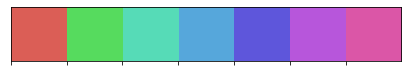

In [364]:
cpal = sns.color_palette("hls",9)
color_pal = [cpal[0], cpal[3], cpal[4], cpal[5], cpal[6], cpal[7], cpal[8]]

sns.palplot(color_pal)

In [365]:
cols_speed = df_features_cleansed.filter(regex='^speed_(?!(x|y))').columns[1:]
cols_speed

Index(['speed_neck', 'speed_tail_base', 'speed_tail_pre_mid', 'speed_tail_mid',
       'speed_tail_post_mid', 'speed_tail_tip'],
      dtype='object')

0it [00:00, ?it/s]

cinuthm3d 0


1it [00:08,  8.87s/it]

cinuthm4d 1


2it [00:18,  9.20s/it]

cralbhm3d 2


3it [00:51, 20.31s/it]

cralbhm4d 3


4it [01:29, 22.48s/it]


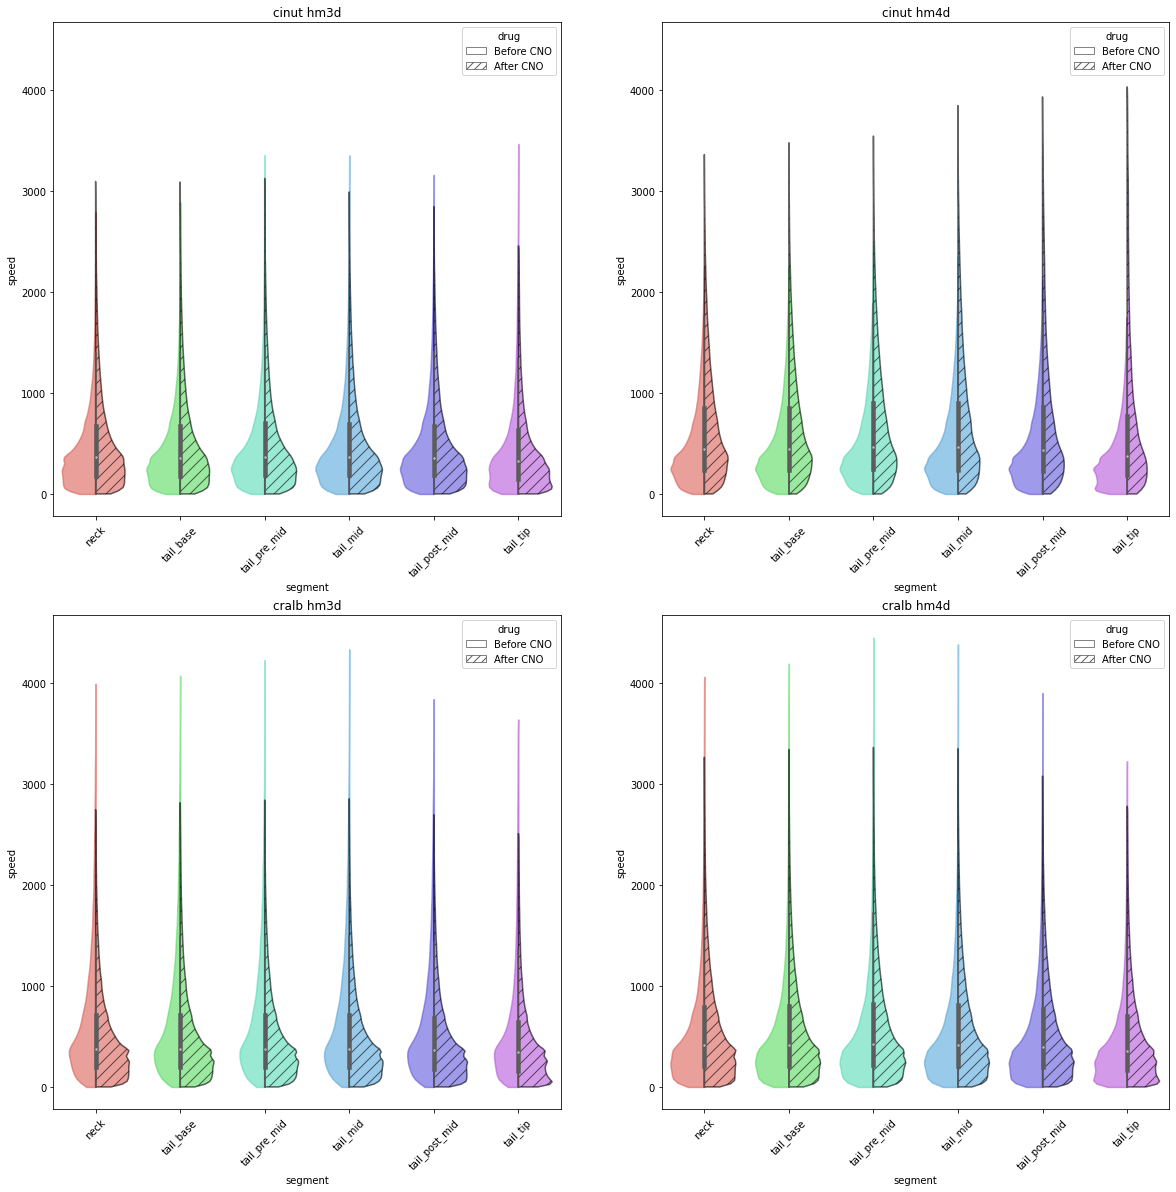

In [371]:
fig, axes = plt.subplots(2,2,figsize=(20,20), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.2,hspace=0.2)
axes = axes.ravel()
feat = 'speed'
for i, gene in tqdm.tqdm(enumerate(['cinuthm3d', 'cinuthm4d','cralbhm3d','cralbhm4d'])):
    
    ax = axes[i]
    print(gene, i)

    df_gene = df_features_cleansed[df_features_cleansed['gene']==gene]
    
    


    df_melted_drug = get_melted_df(df_gene, feat, 'cno')
    df_melted_control = get_melted_df(df_gene, feat, 'none')

    df_melted_pair = pd.concat([df_melted_control, df_melted_drug])
    
    sns.violinplot(data = df_melted_pair, x = 'segment', y= feat, hue='drug', split = True, 
               palette = color_pal, ax=ax, cut=0)
    
    ax.set_xticklabels(["neck","tail_base", "tail_pre_mid", "tail_mid", 
                     "tail_post_mid","tail_tip"], rotation=45); 

    ax.set_title(' '.join([''.join(gene[:-4]), ''.join(gene[-4:])]))

    plt.setp(ax.collections, alpha=.6);
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelbottom=True)

    for i, violin in enumerate(ax.findobj(mpl.collections.PolyCollection)):
        if i in [0,1]:
            violin.set_color(color_pal[0])
        elif i in [2,3]:
            violin.set_color(color_pal[1])
        elif i in [4,5]:
            violin.set_color(color_pal[2])
        elif i in [6,7]:
            violin.set_color(color_pal[3])
        elif i in [8,9]:
            violin.set_color(color_pal[4])
        else:
            violin.set_color(color_pal[5])


    for i, violin in enumerate(ax.findobj(mpl.collections.PolyCollection)):
        if i % 2:
            violin.set_hatch("//")
            violin.set_edgecolor('k')


    #ax.legend_.remove()
    ax.legend_.findobj(mpl.patches.Rectangle)[0].set_facecolor("None")
    ax.legend_.findobj(mpl.patches.Rectangle)[1].set_facecolor("None")
    ax.legend_.findobj(mpl.patches.Rectangle)[1].set_hatch("///")


In [373]:
speed_ax_ylim = ax.get_ylim()
speed_ax_ylim

(-222.6187750011001, 4674.994275023102)

# Curvatures : Figure 19

In [367]:
cols_curv = df_features_cleansed.filter(like='curv').columns[1:]
cols_curv

Index(['curv_neck', 'curv_tail_base', 'curv_tail_pre_mid', 'curv_tail_mid',
       'curv_tail_post_mid', 'curv_tail_tip'],
      dtype='object')

0it [00:00, ?it/s]

cinuthm3d 0


1it [00:10, 10.41s/it]

cinuthm4d 1


2it [00:21, 10.78s/it]

cralbhm3d 2


3it [01:01, 24.28s/it]

cralbhm4d 3


4it [01:48, 27.03s/it]


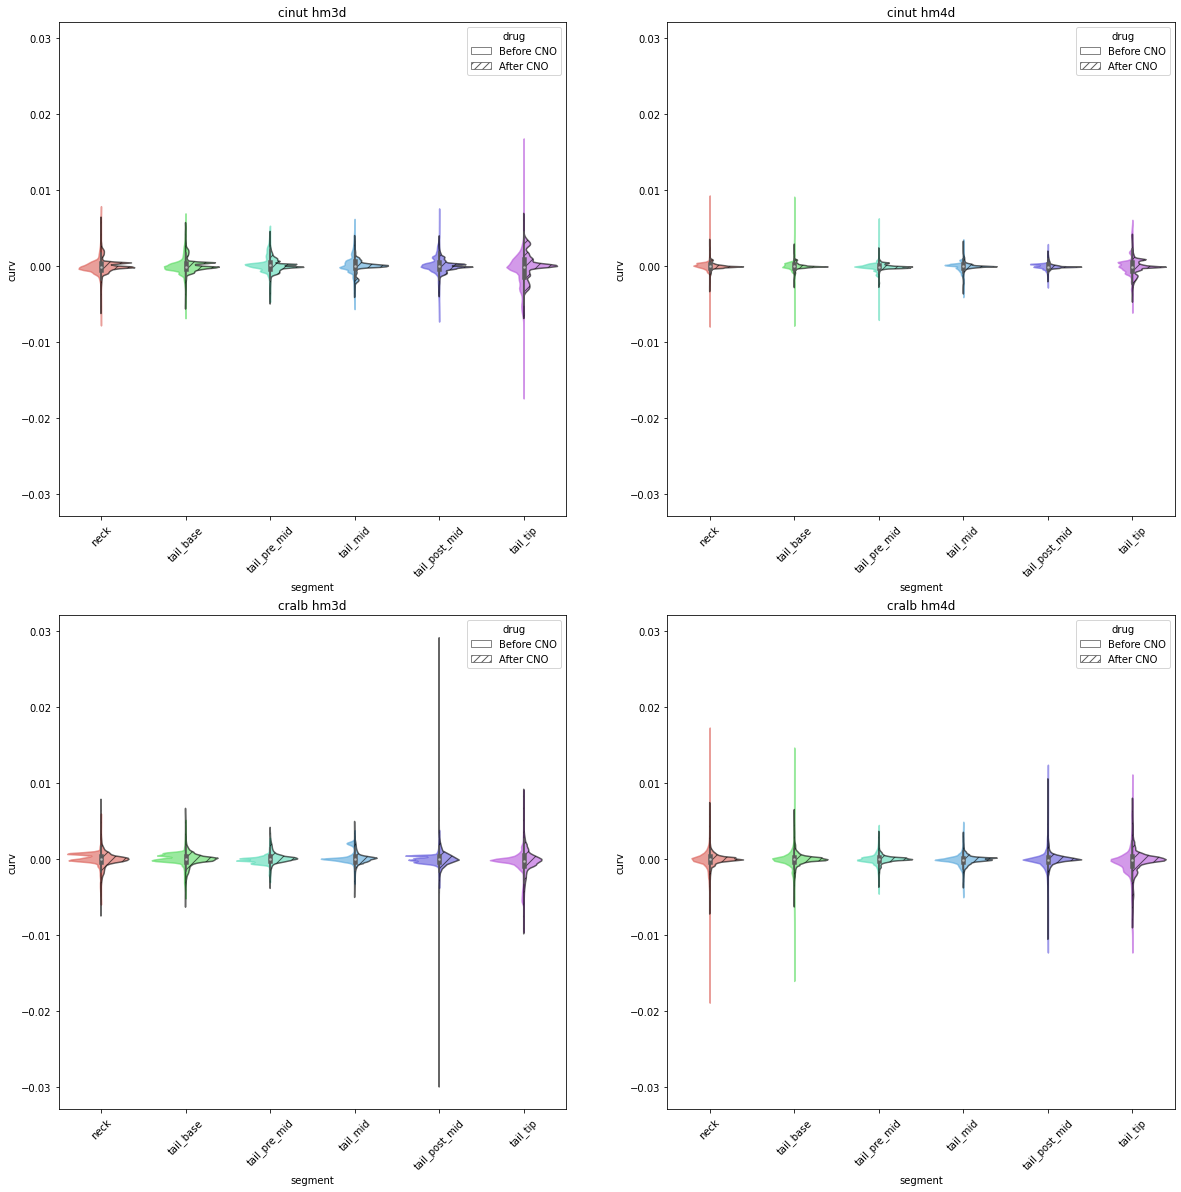

In [368]:
fig, axes = plt.subplots(2,2,figsize=(20,20), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.2,hspace=0.2)
axes = axes.ravel()
feat = 'curv'
for i, gene in tqdm.tqdm(enumerate(['cinuthm3d', 'cinuthm4d','cralbhm3d','cralbhm4d'])):
    
    ax = axes[i]
    print(gene, i)

    df_gene = df_features_cleansed[df_features_cleansed['gene']==gene]

    df_melted_drug = get_melted_df(df_gene, feat, 'cno')
    df_melted_control = get_melted_df(df_gene, feat, 'none')

    df_melted_pair = pd.concat([df_melted_control, df_melted_drug])
    sns.violinplot(data = df_melted_pair, x = 'segment', y= feat, hue='drug', split = True, 
               palette = color_pal, ax=ax, cut=0)
    
    ax.set_xticklabels(["neck","tail_base", "tail_pre_mid", "tail_mid", 
                     "tail_post_mid","tail_tip"], rotation=45); 
    
    
    ax.set_title(' '.join([''.join(gene[:-4]), ''.join(gene[-4:])]))

    plt.setp(ax.collections, alpha=.6);
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelbottom=True)

    for i, violin in enumerate(ax.findobj(mpl.collections.PolyCollection)):
        if i in [0,1]:
            violin.set_color(color_pal[0])
        elif i in [2,3]:
            violin.set_color(color_pal[1])
        elif i in [4,5]:
            violin.set_color(color_pal[2])
        elif i in [6,7]:
            violin.set_color(color_pal[3])
        elif i in [8,9]:
            violin.set_color(color_pal[4])
        else:
            violin.set_color(color_pal[5])


    for i, violin in enumerate(ax.findobj(mpl.collections.PolyCollection)):
        if i % 2:
            violin.set_hatch("//")
            violin.set_edgecolor('k')


    #ax.legend_.remove()
    ax.legend_.findobj(mpl.patches.Rectangle)[0].set_facecolor("None")
    ax.legend_.findobj(mpl.patches.Rectangle)[1].set_facecolor("None")
    ax.legend_.findobj(mpl.patches.Rectangle)[1].set_hatch("///")


In [370]:
curv_ax_ylim = ax.get_ylim()

# Violin plots: final

4it [03:19, 49.76s/it]


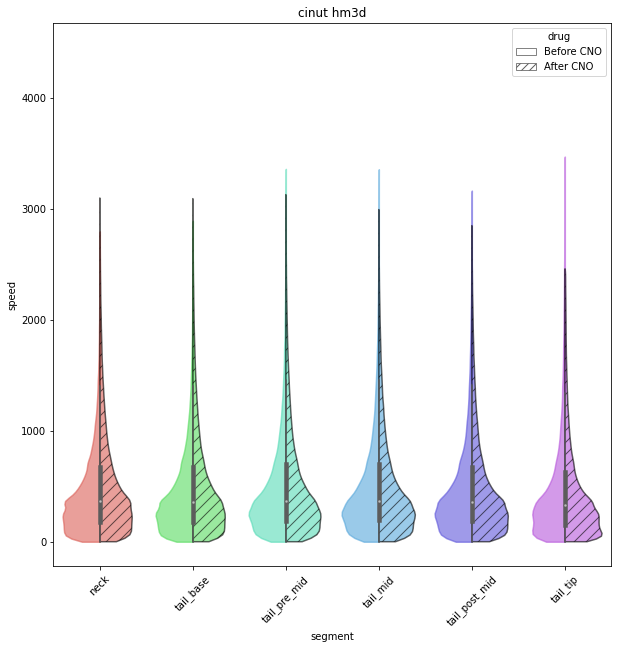

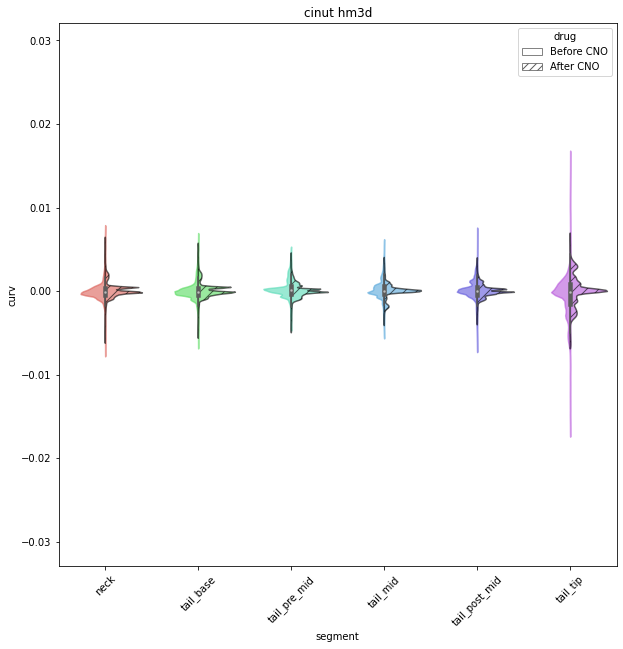

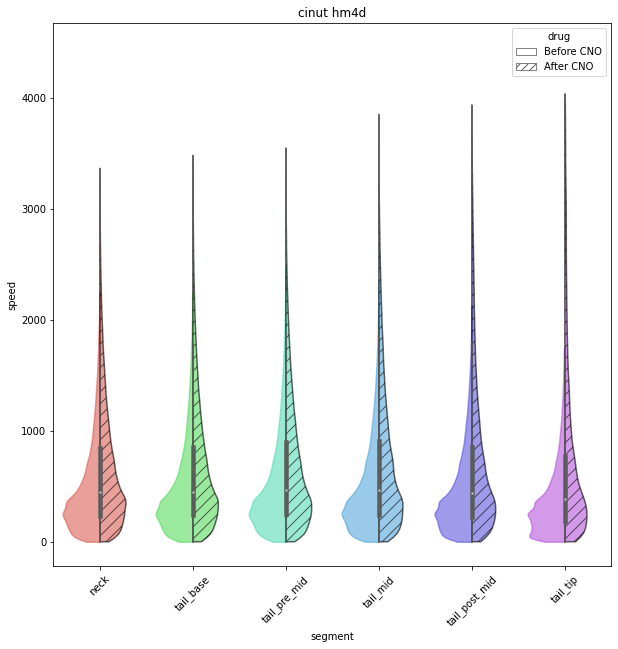

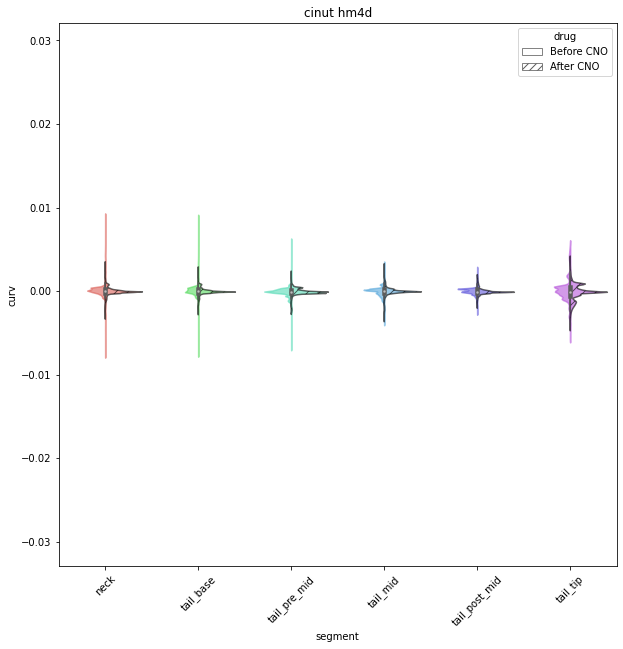

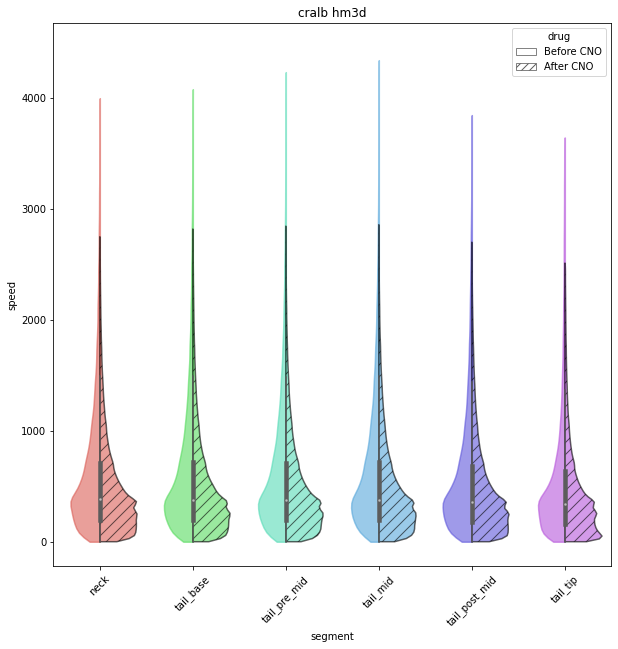

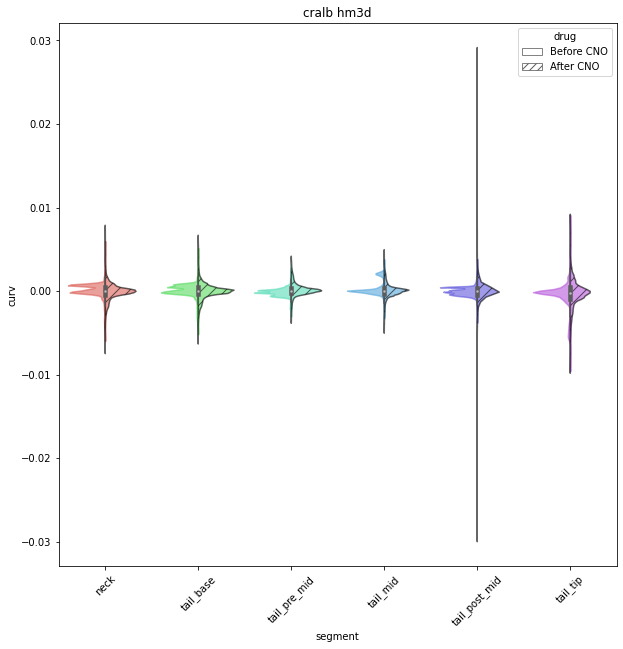

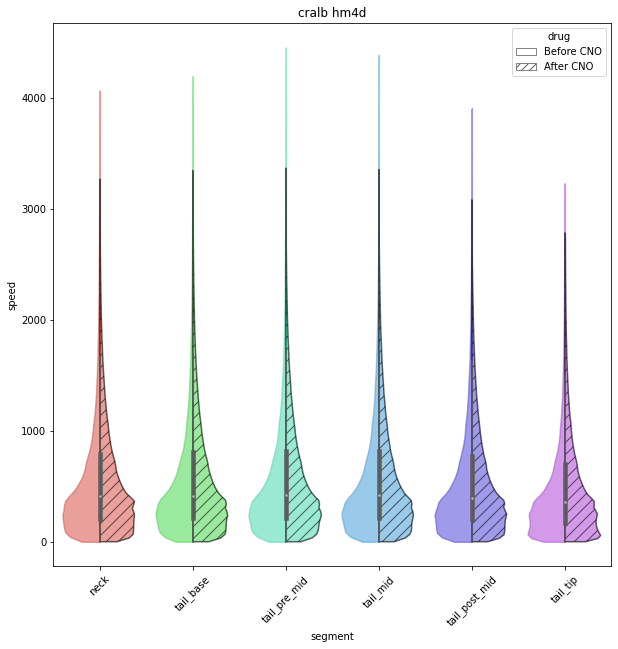

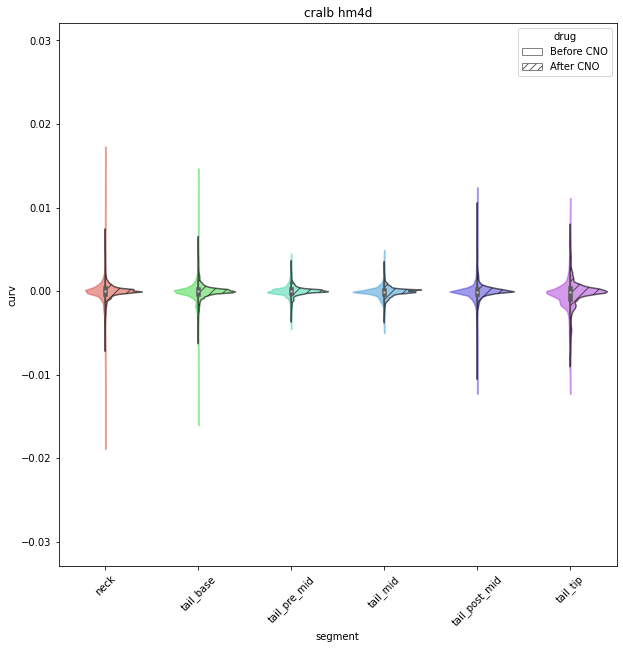

In [375]:

for i, gene in tqdm.tqdm(enumerate(['cinuthm3d', 'cinuthm4d','cralbhm3d','cralbhm4d'])):
    for feat in ['speed', 'curv']:
        
        fig, ax = plt.subplots(1,1,figsize=(10,10))
        df_gene = df_features_cleansed[df_features_cleansed['gene']==gene]

        df_melted_drug = get_melted_df(df_gene, feat, 'cno')
        df_melted_control = get_melted_df(df_gene, feat, 'none')

        df_melted_pair = pd.concat([df_melted_control, df_melted_drug])
        sns.violinplot(data = df_melted_pair, x = 'segment', y= feat, hue='drug', split = True, 
                   palette = color_pal, ax=ax, cut=0)

        ax.set_xticklabels(["neck","tail_base", "tail_pre_mid", "tail_mid", 
                         "tail_post_mid","tail_tip"], rotation=45); 


        ax.set_title(' '.join([''.join(gene[:-4]), ''.join(gene[-4:])]))

        plt.setp(ax.collections, alpha=.6);
        ax.xaxis.set_tick_params(labelbottom=True)
        ax.yaxis.set_tick_params(labelbottom=True)

        for i, violin in enumerate(ax.findobj(mpl.collections.PolyCollection)):
            if i in [0,1]:
                violin.set_color(color_pal[0])
            elif i in [2,3]:
                violin.set_color(color_pal[1])
            elif i in [4,5]:
                violin.set_color(color_pal[2])
            elif i in [6,7]:
                violin.set_color(color_pal[3])
            elif i in [8,9]:
                violin.set_color(color_pal[4])
            else:
                violin.set_color(color_pal[5])


        for i, violin in enumerate(ax.findobj(mpl.collections.PolyCollection)):
            if i % 2:
                violin.set_hatch("//")
                violin.set_edgecolor('k')


        #ax.legend_.remove()
        ax.legend_.findobj(mpl.patches.Rectangle)[0].set_facecolor("None")
        ax.legend_.findobj(mpl.patches.Rectangle)[1].set_facecolor("None")
        ax.legend_.findobj(mpl.patches.Rectangle)[1].set_hatch("///")
        
        if feat == 'curv':
            ax.set_ylim([curv_ax_ylim[0], curv_ax_ylim[1]])
        else:
            ax.set_ylim([speed_ax_ylim[0], speed_ax_ylim[1]])
            
        fig.savefig(f'./results/figures/violinplot_{feat}_{gene}.svg')
            


# DATA as csv

In [376]:
for feat in ['speed', 'curv']:
    for gene in ['cinuthm3d', 'cinuthm4d','cralbhm3d','cralbhm4d']:
        df_gene = df_features_cleansed[df_features_cleansed['gene']==gene]
        for drug in ['cno', 'none']:
            df_gene_drug = get_melted_df(df=df_gene, feat=feat, drug=drug, melted=False)
            df_gene_drug.reset_index(drop=True, inplace=True)
            
            filename = f'./results/data_violinplots/data_violinplot_{feat}_{gene}_{drug}.csv'
            df_gene_drug.filter(like=feat).to_csv(filename)

# Statistics - Testing for normality

In [377]:
feats_dict = {'speed': cols_speed,
             'curv': cols_curv}

/share/python-virtual-environments/vame0_1/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/share/python-virtual-environments/vame0_1/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/share/python-virtual-environments/vame0_1/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/share/python-virtual-environments/vame0_1/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/tmp/ipykernel_1441986/2421835953.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pypl

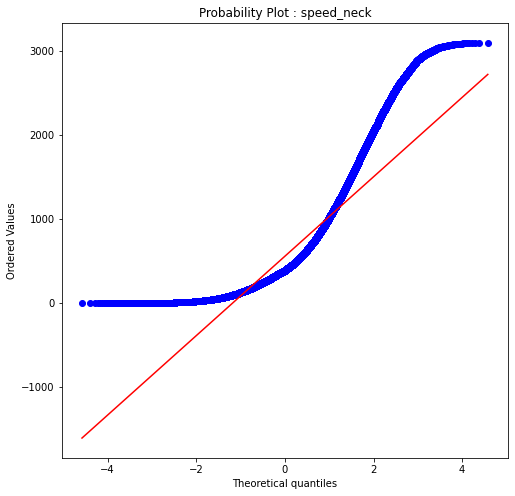

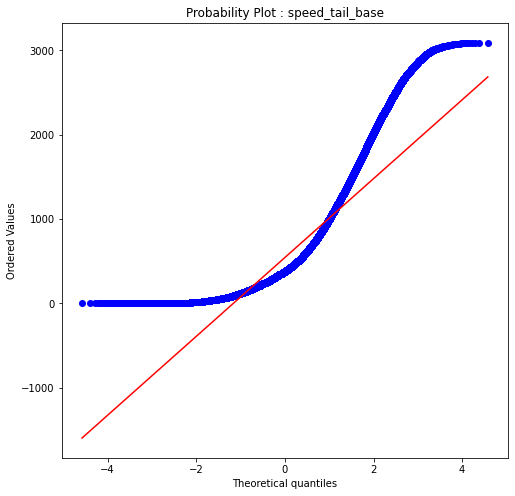

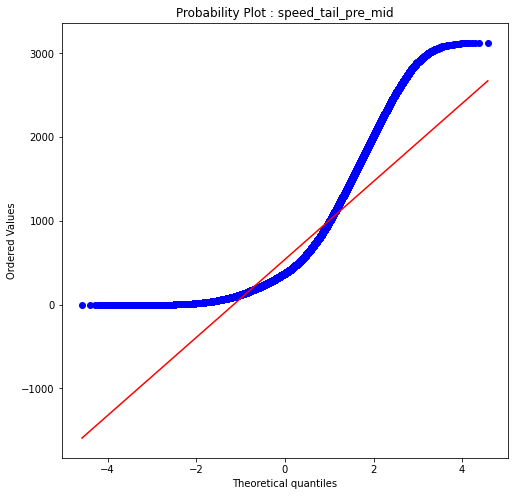

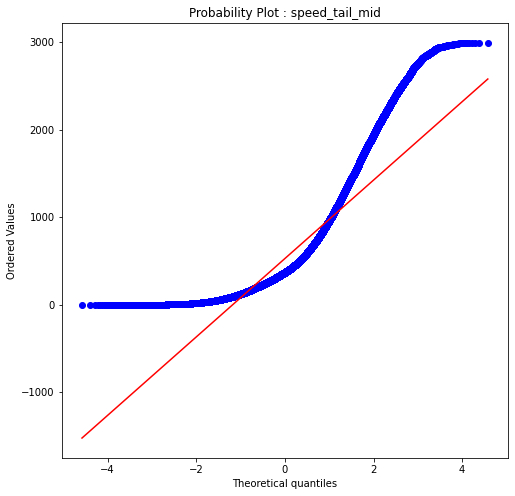

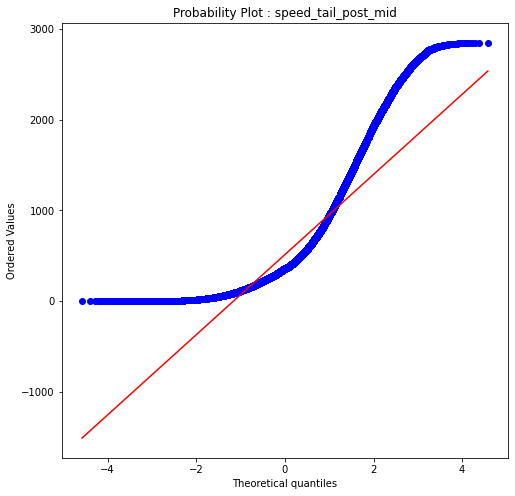

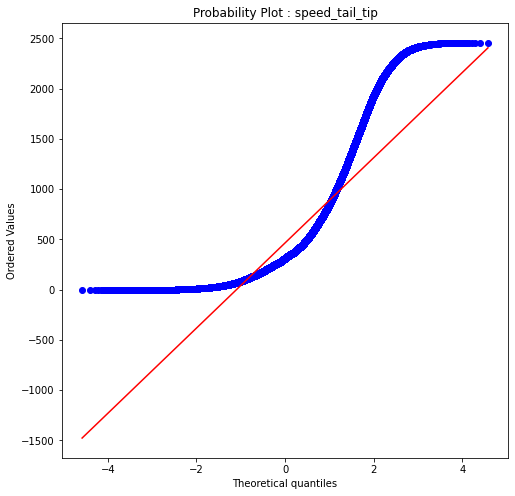

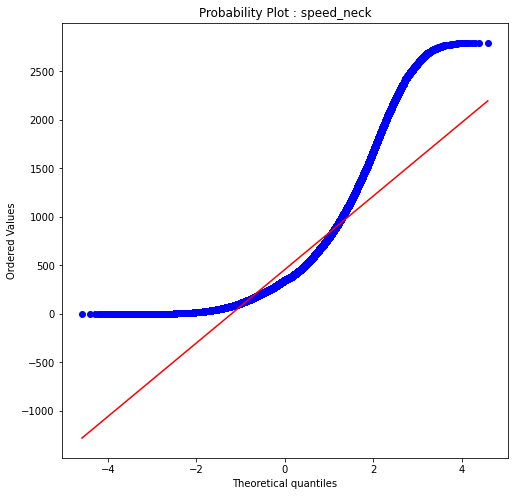

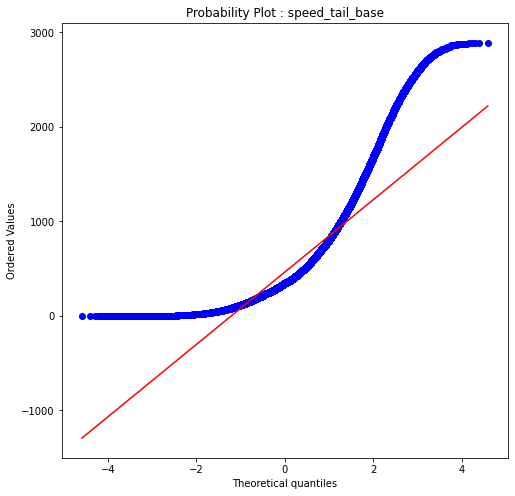

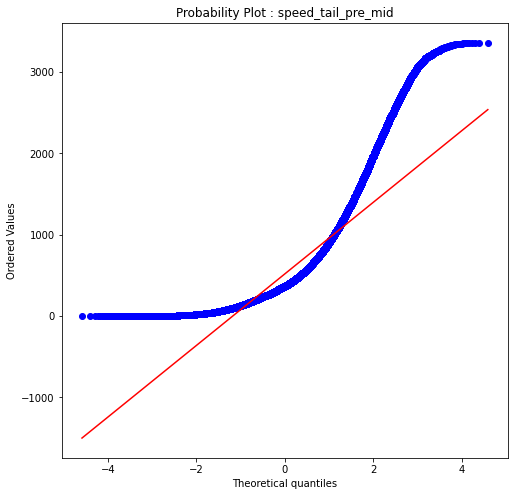

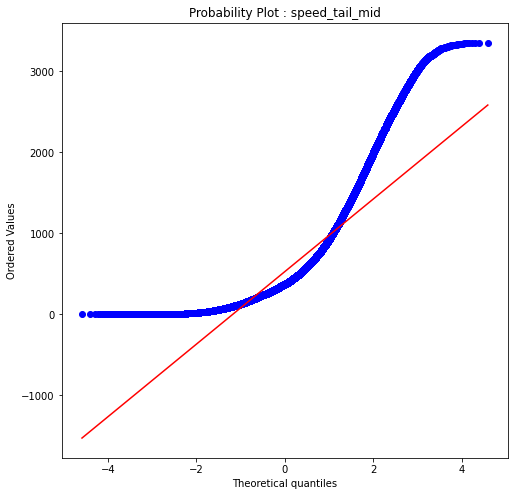

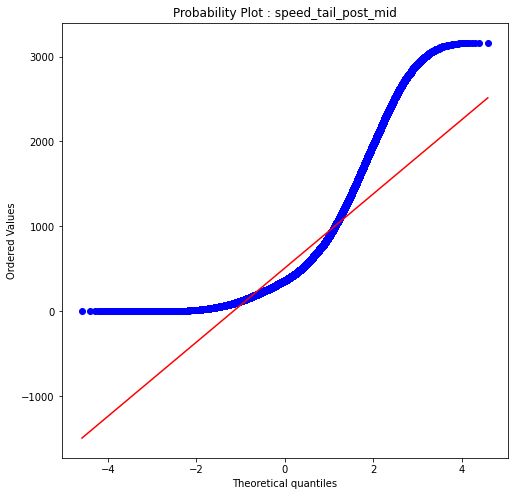

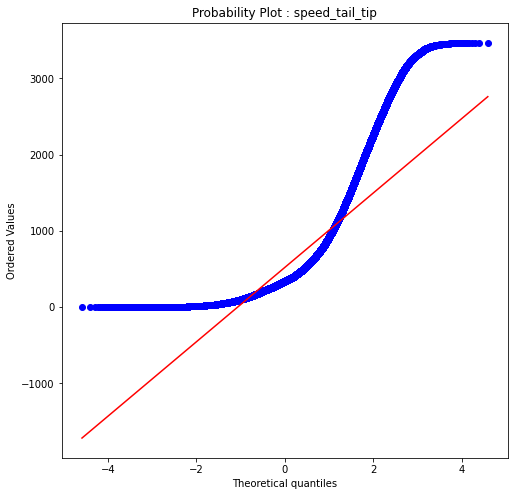

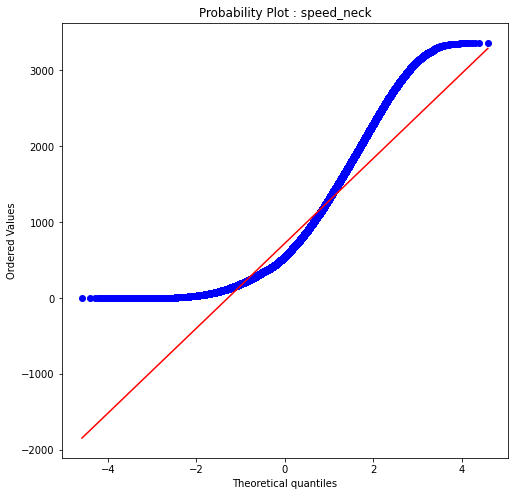

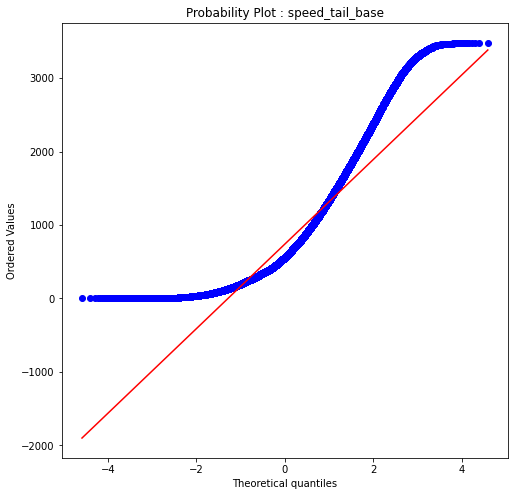

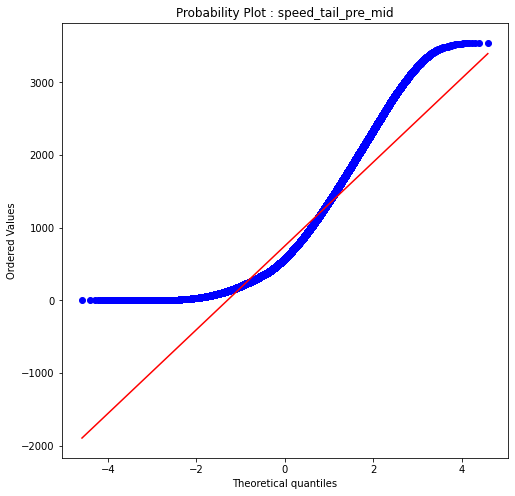

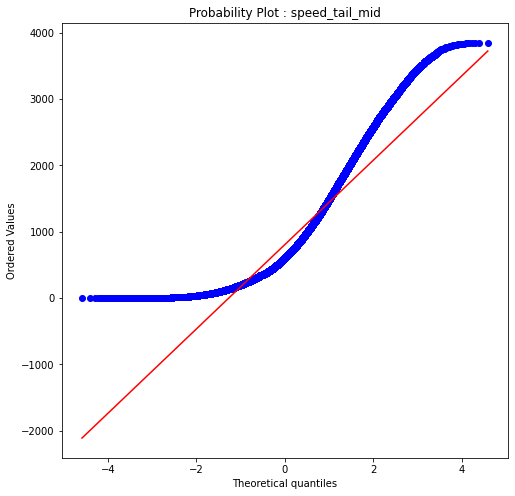

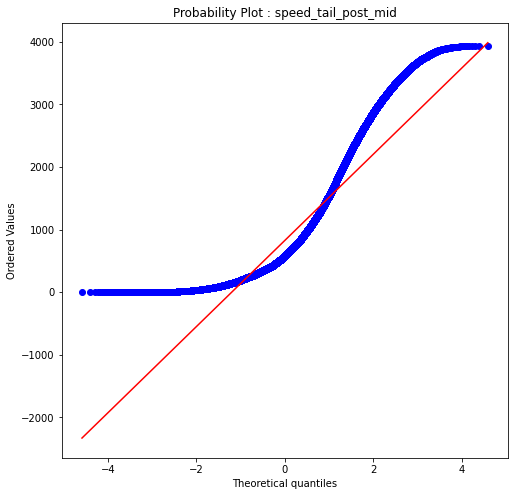

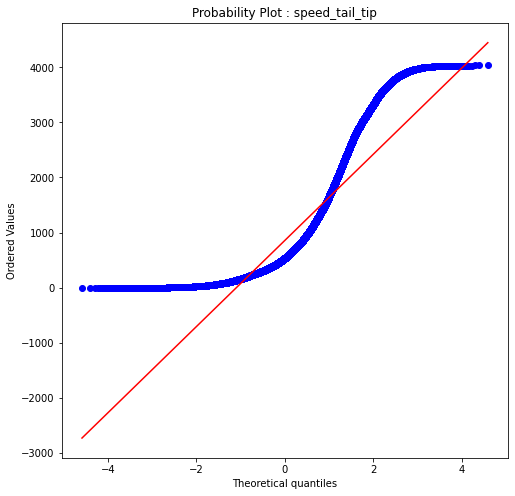

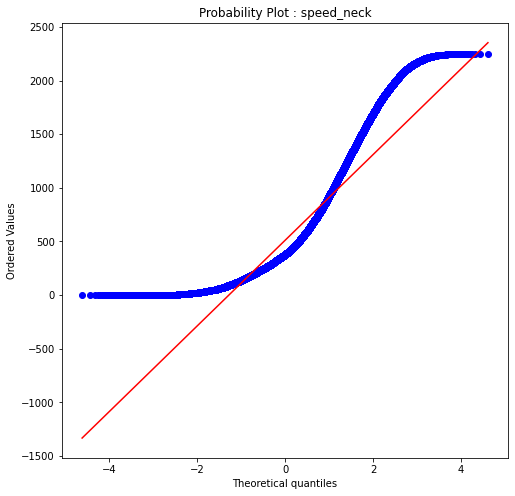

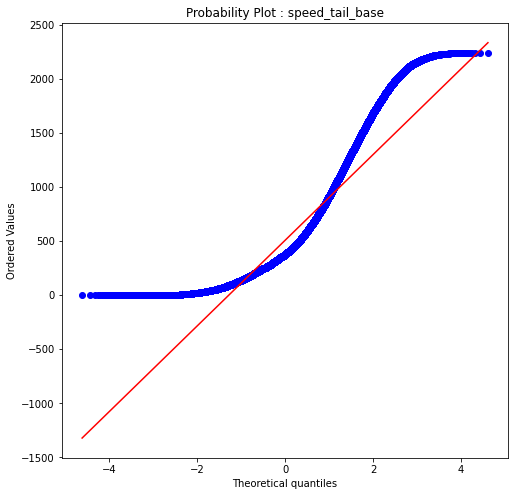

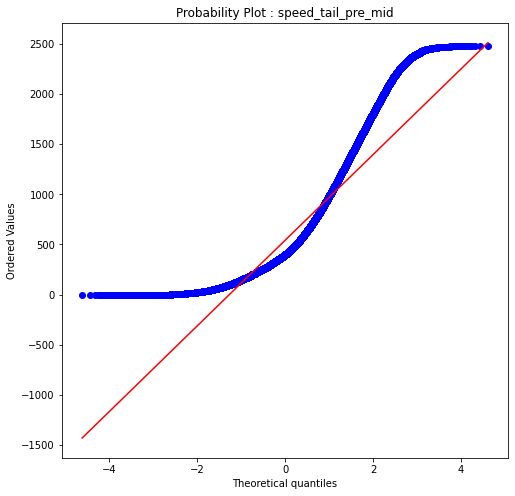

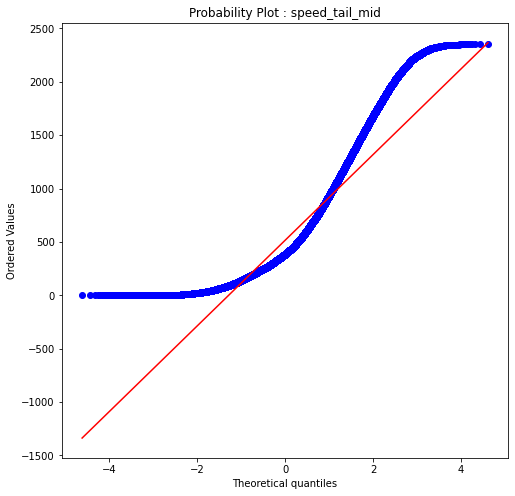

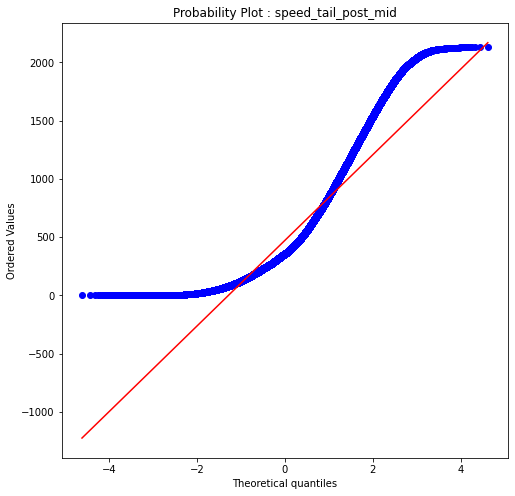

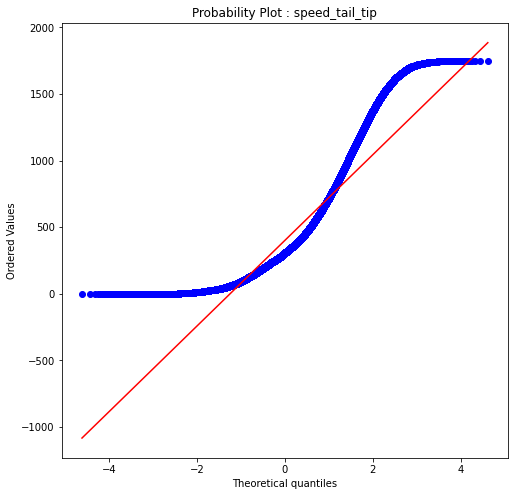

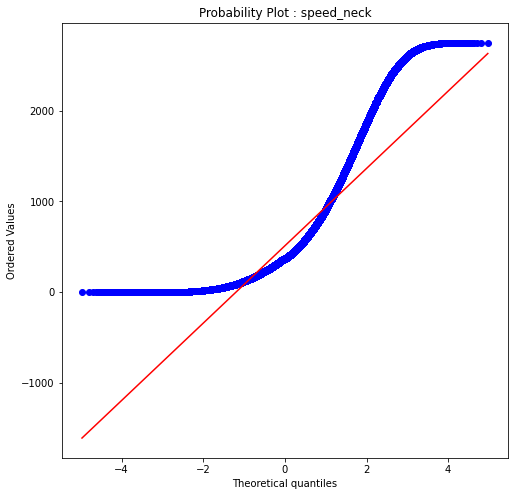

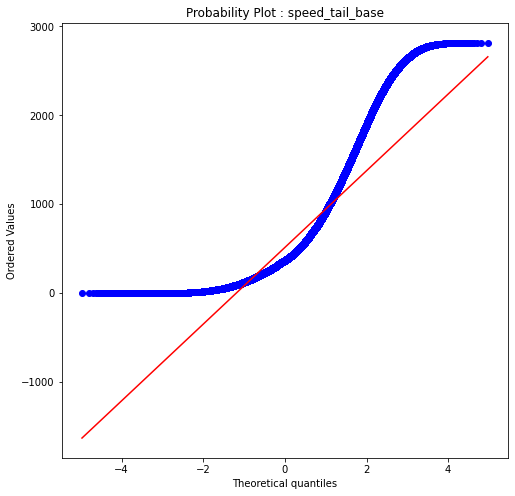

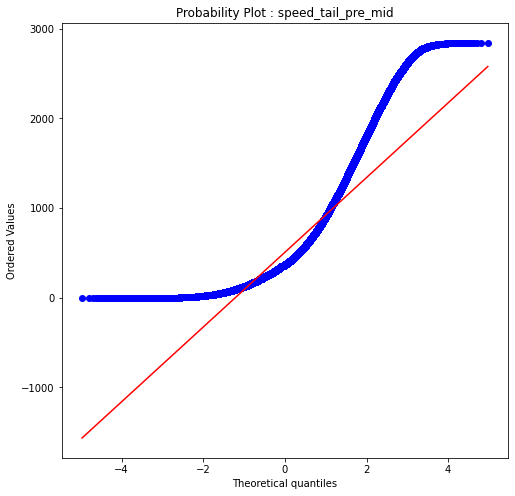

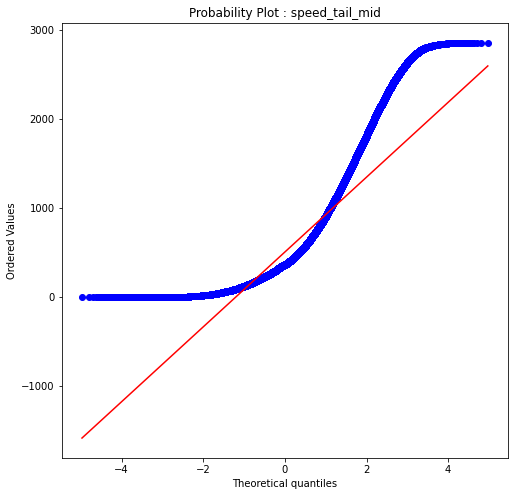

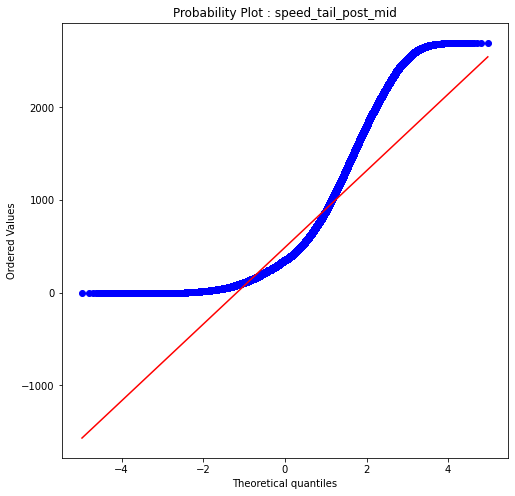

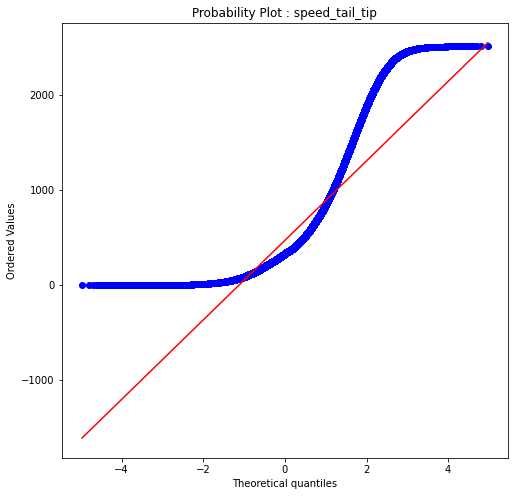

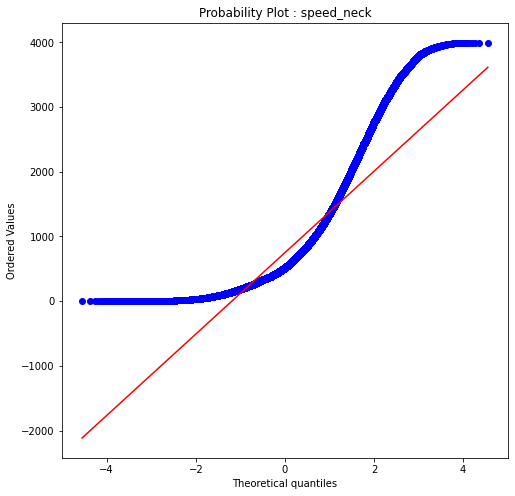

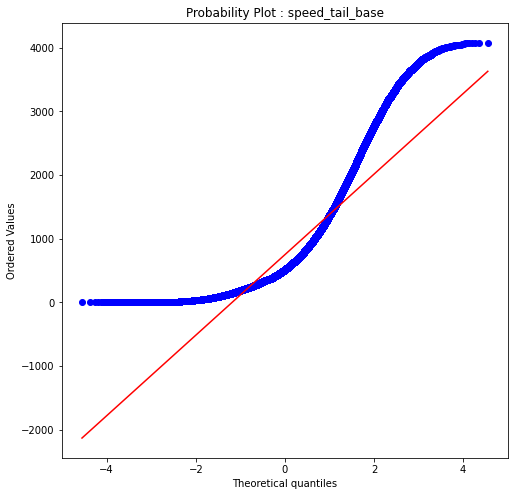

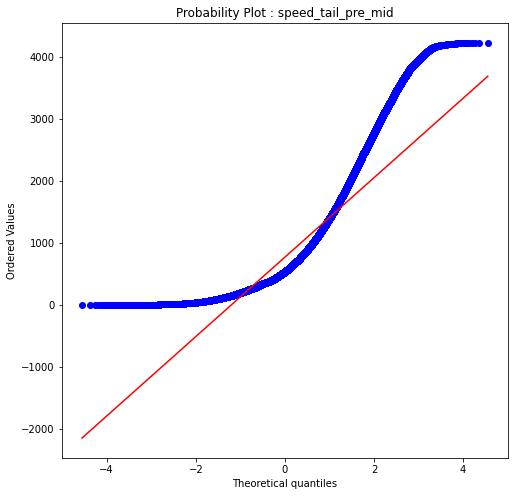

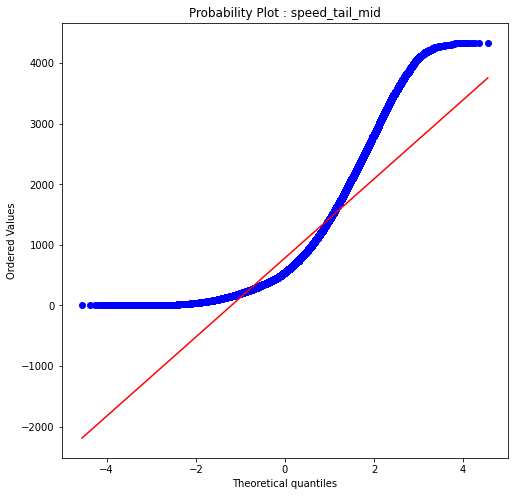

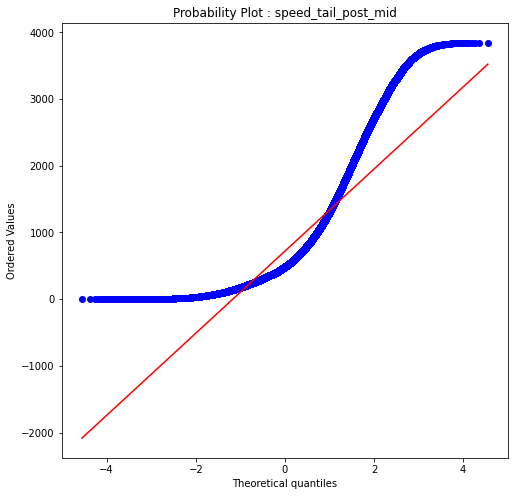

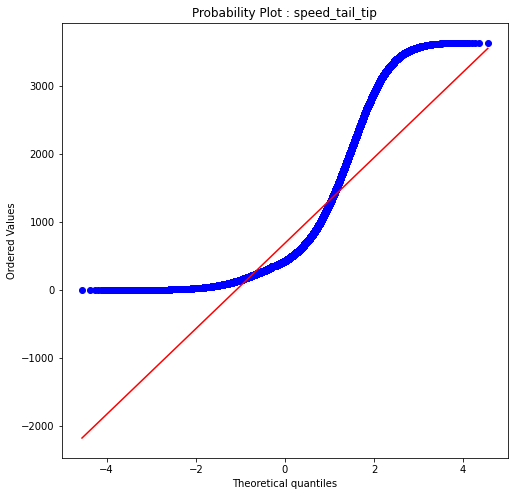

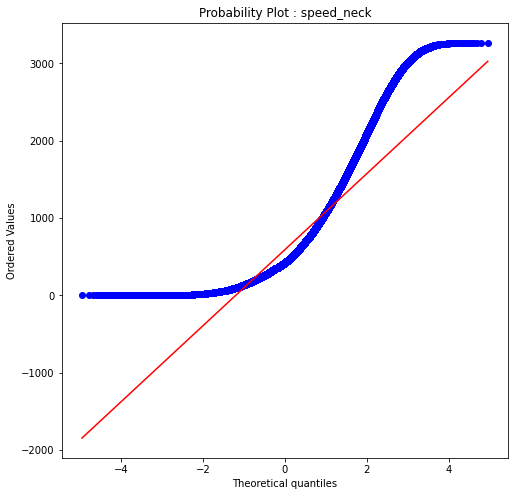

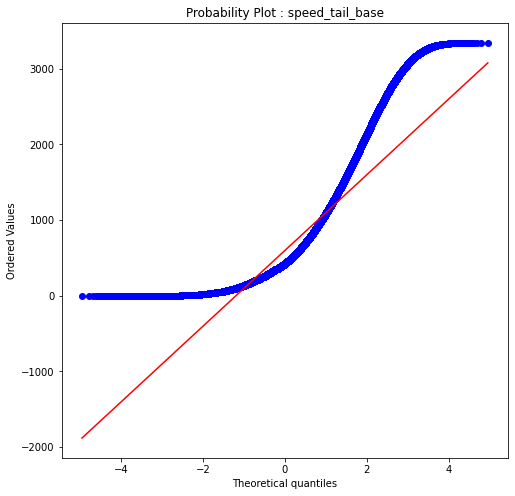

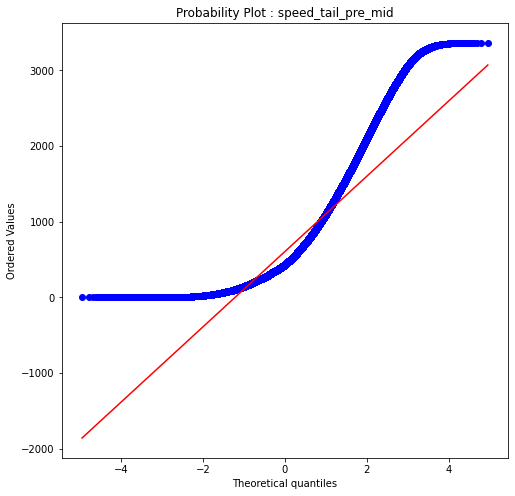

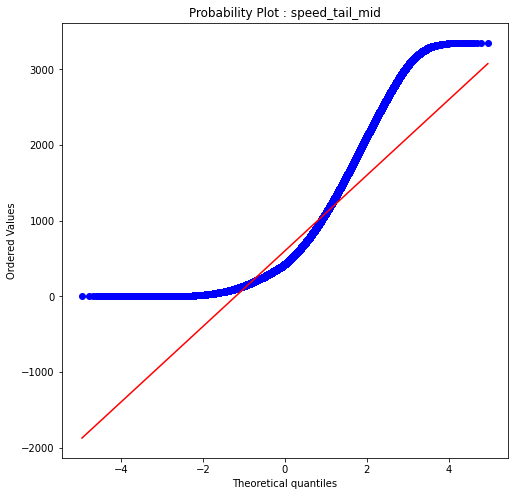

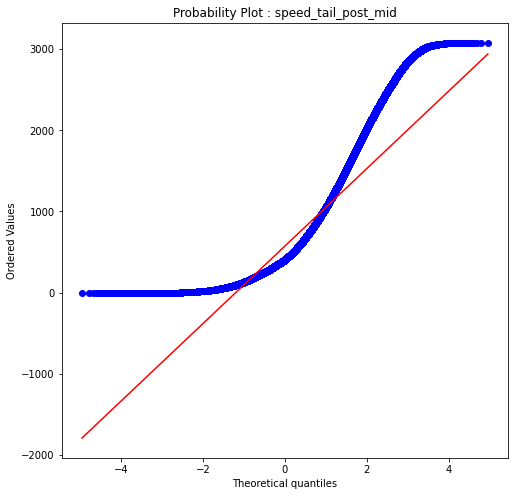

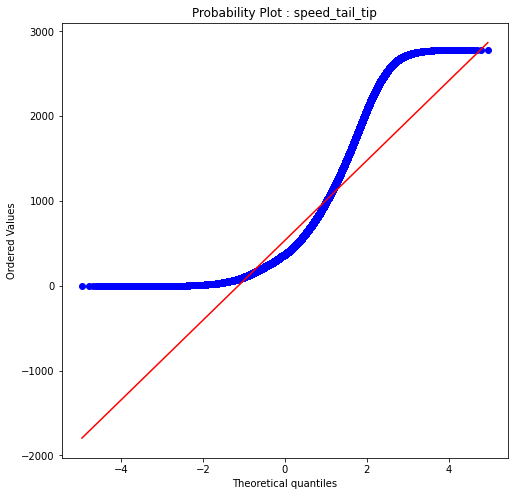

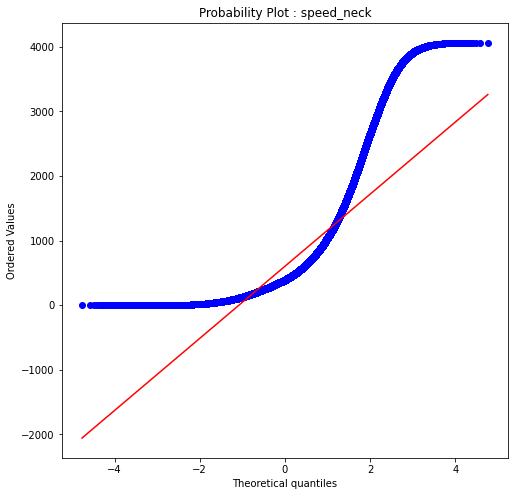

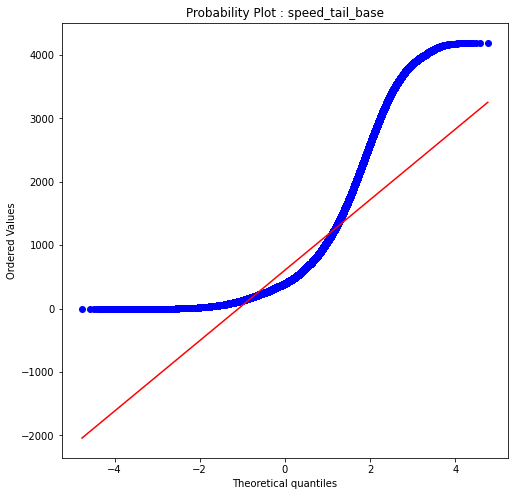

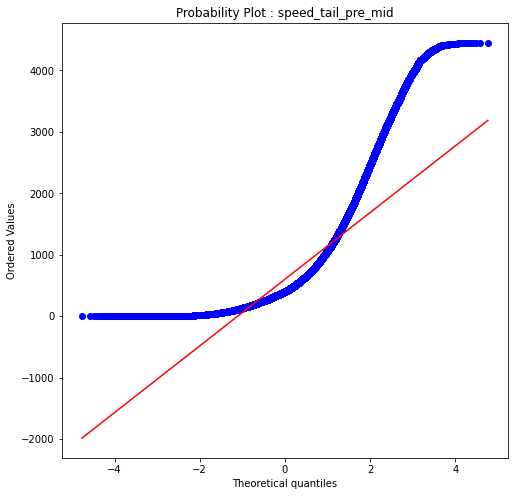

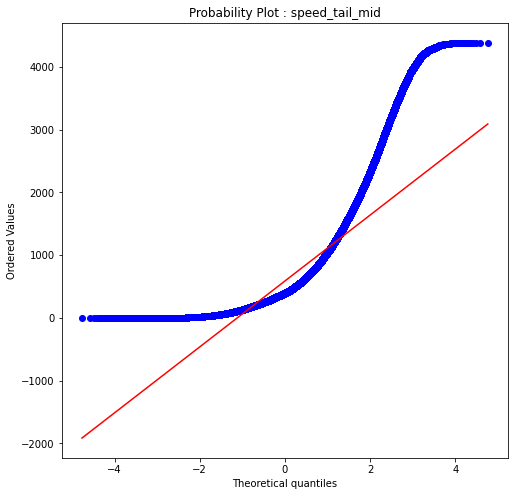

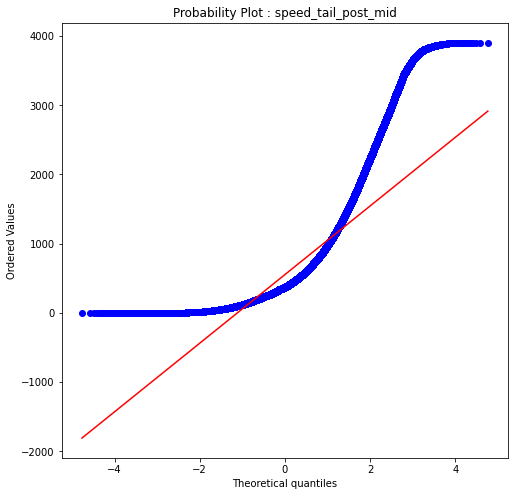

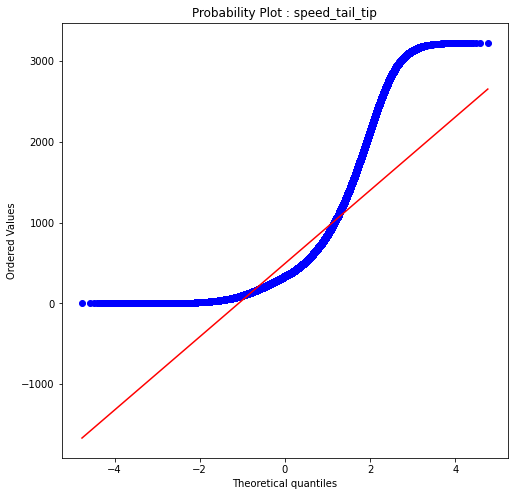

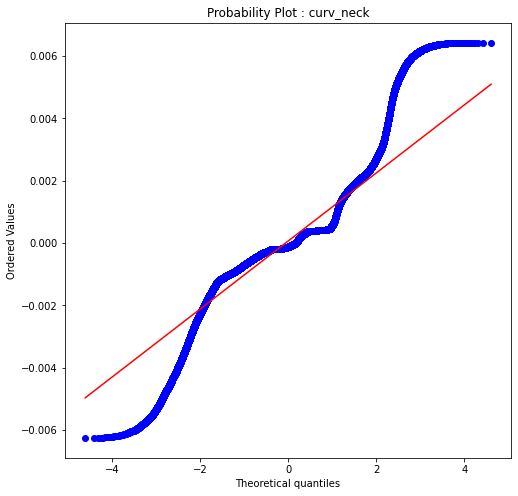

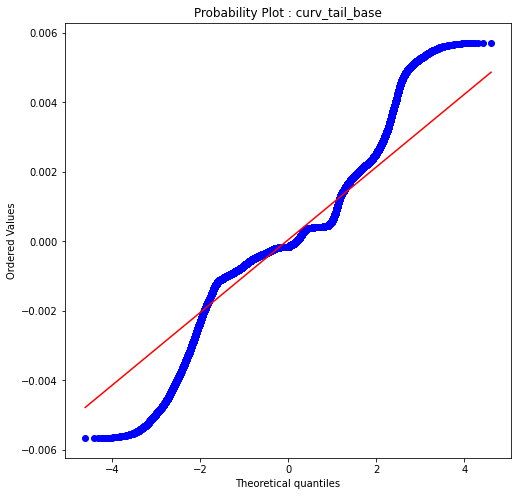

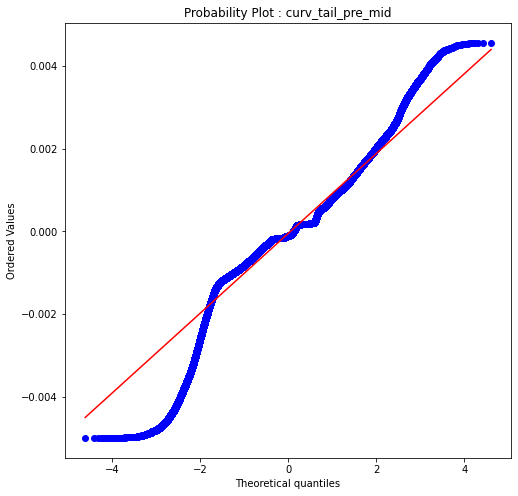

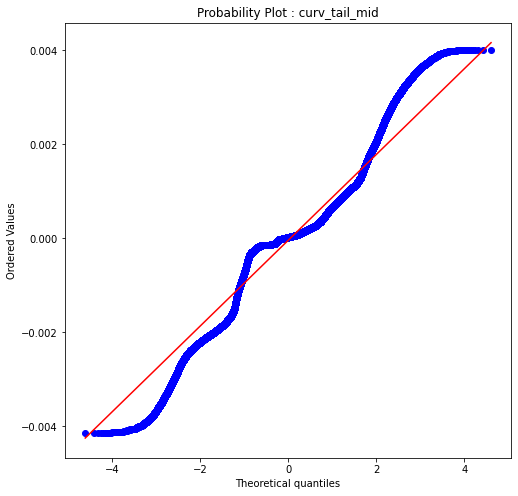

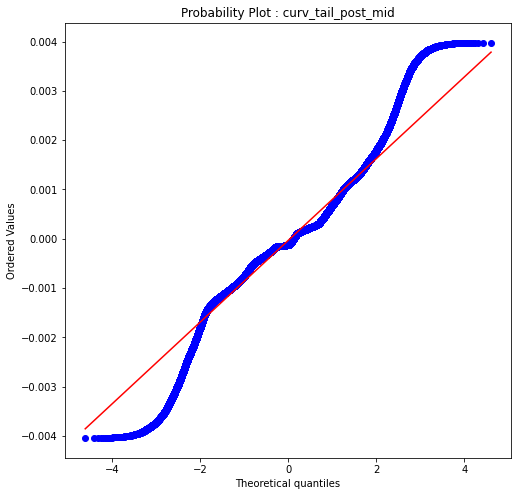

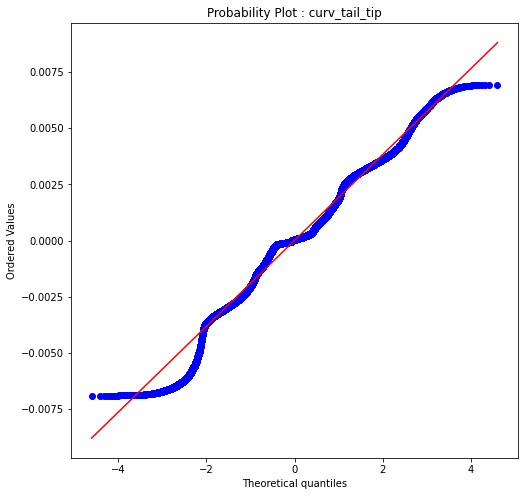

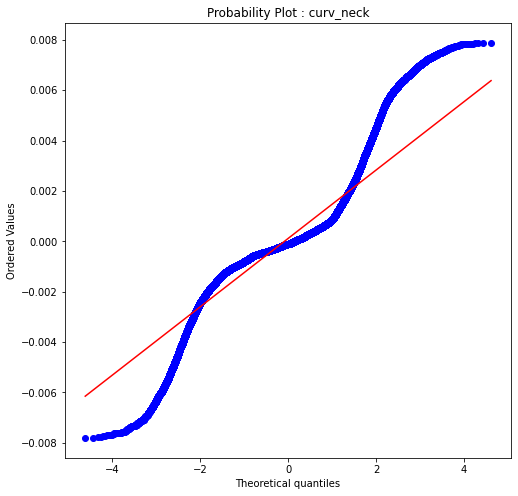

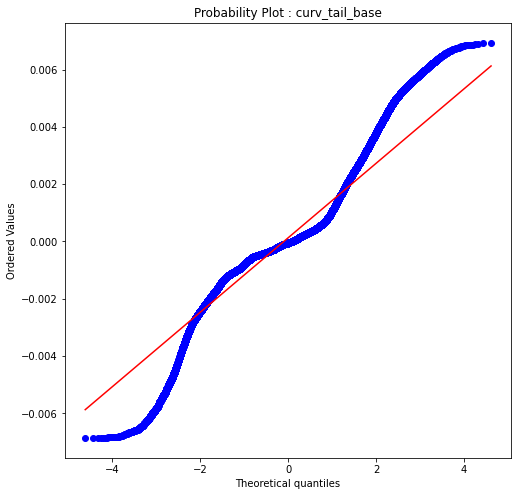

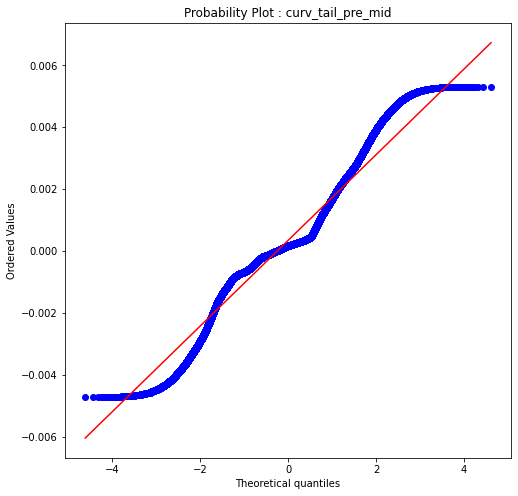

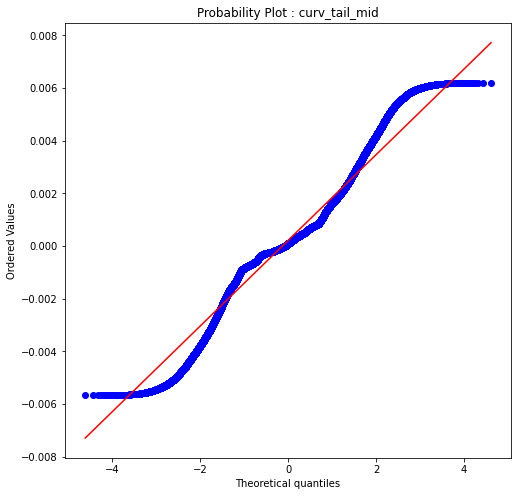

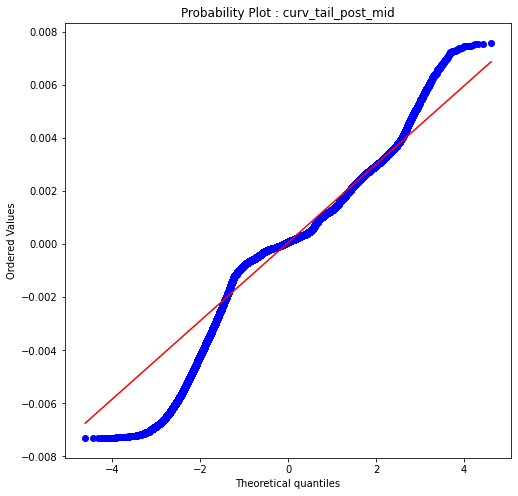

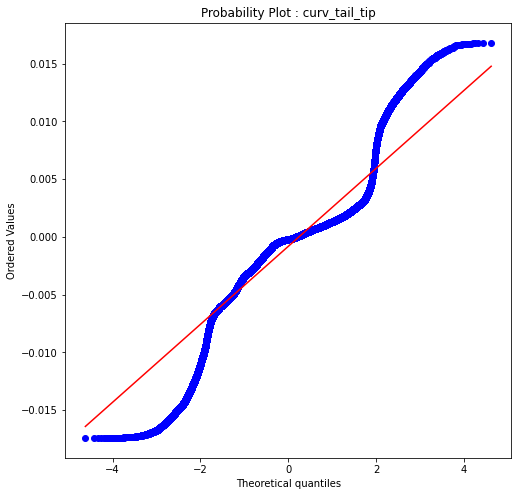

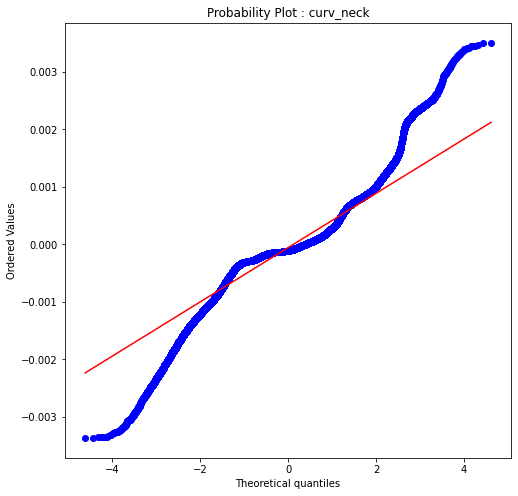

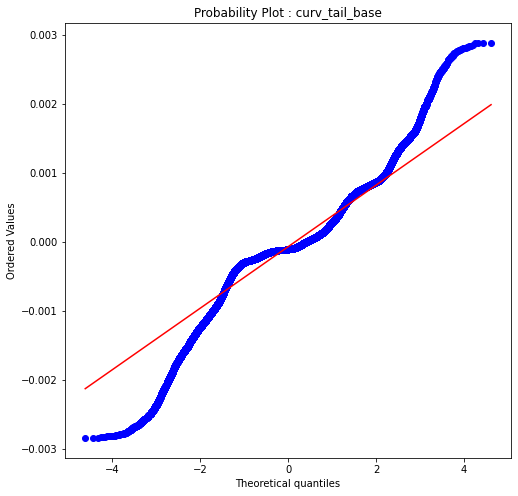

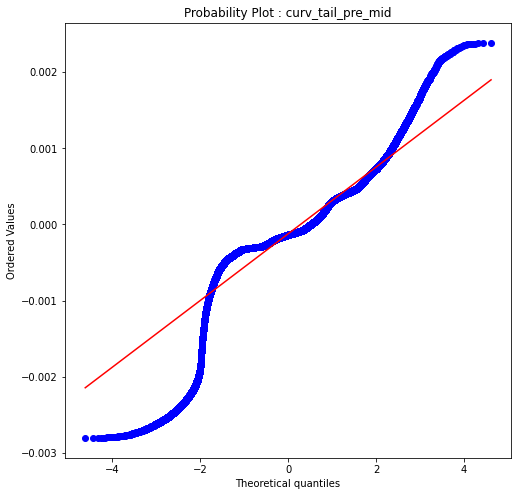

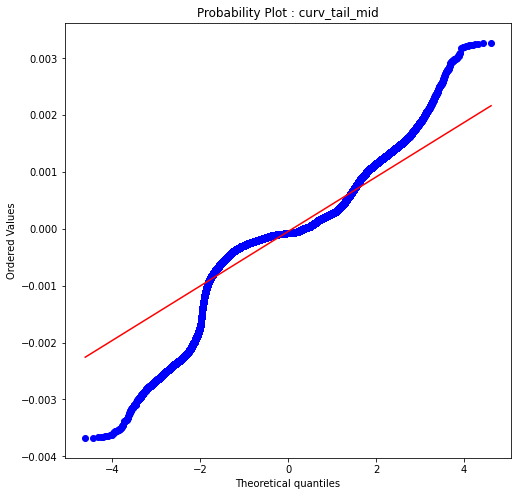

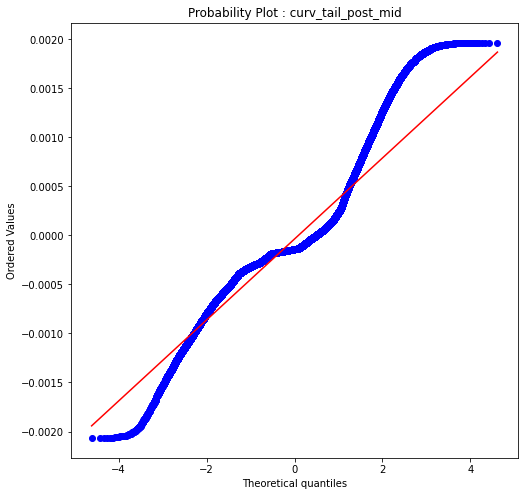

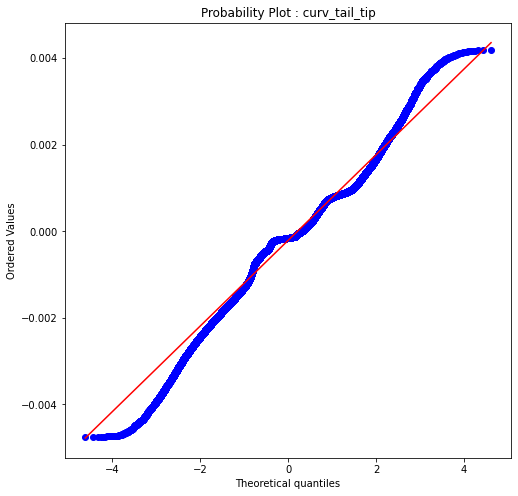

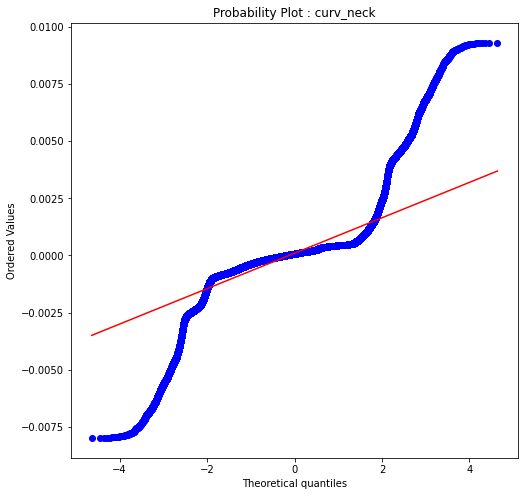

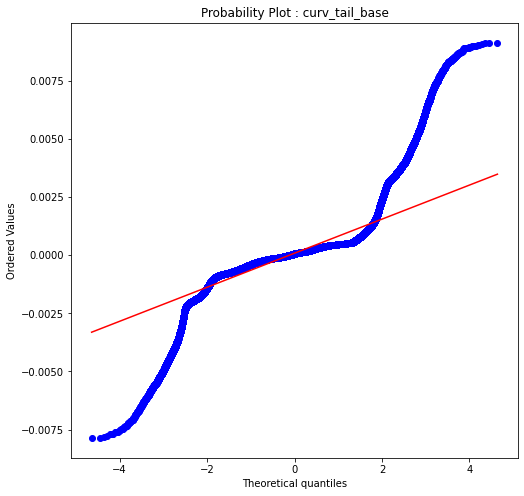

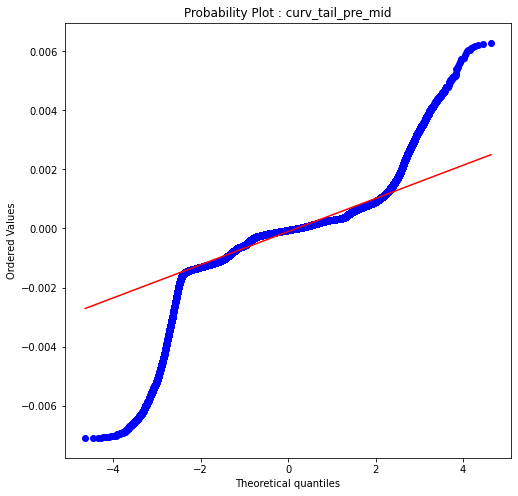

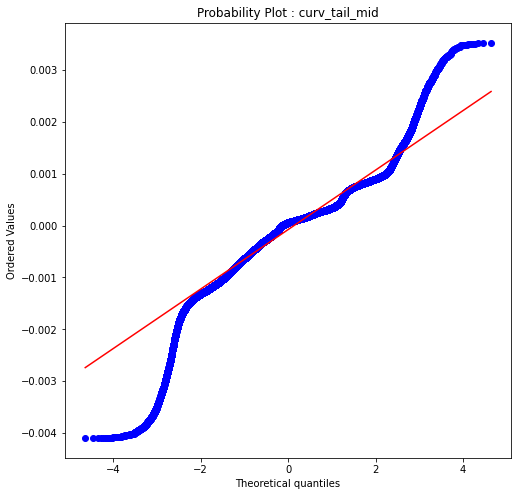

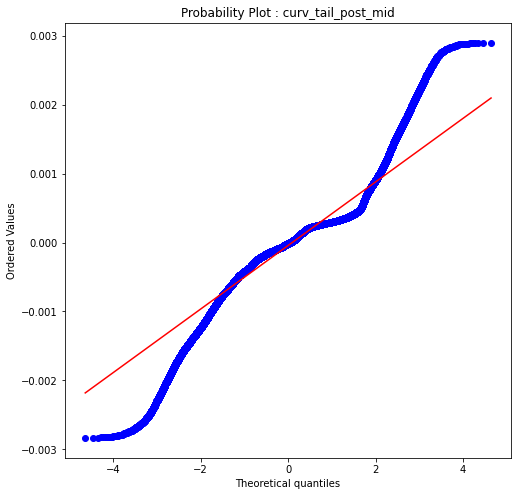

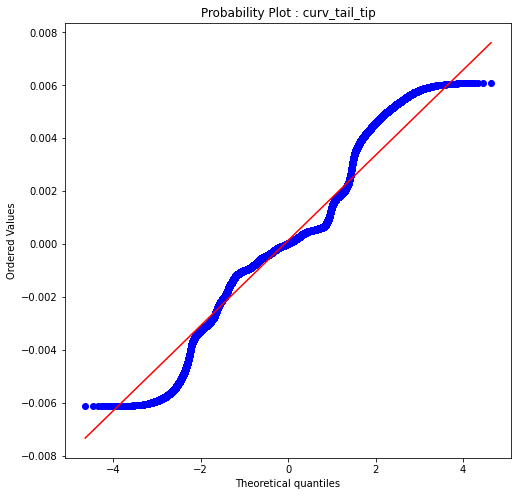

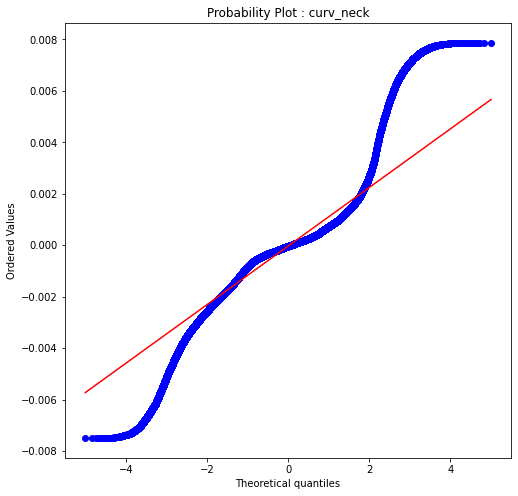

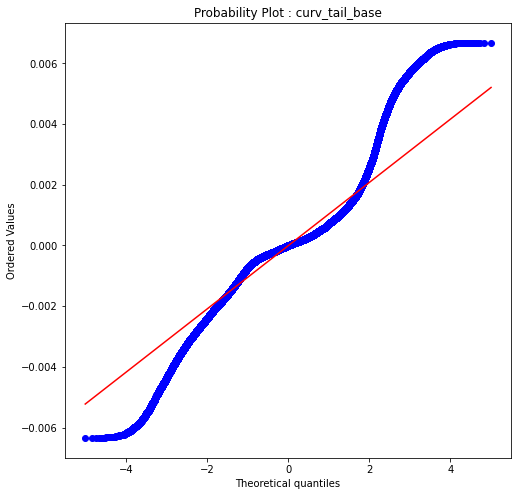

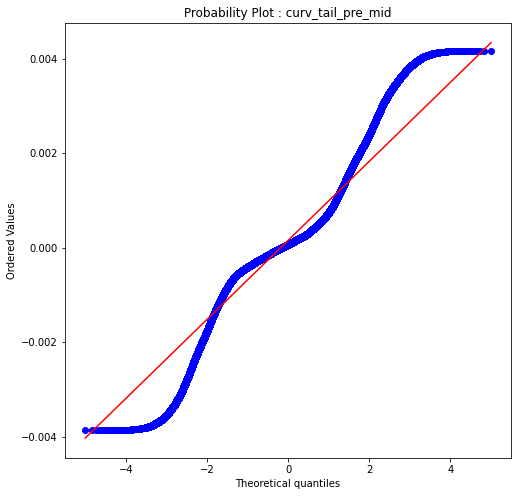

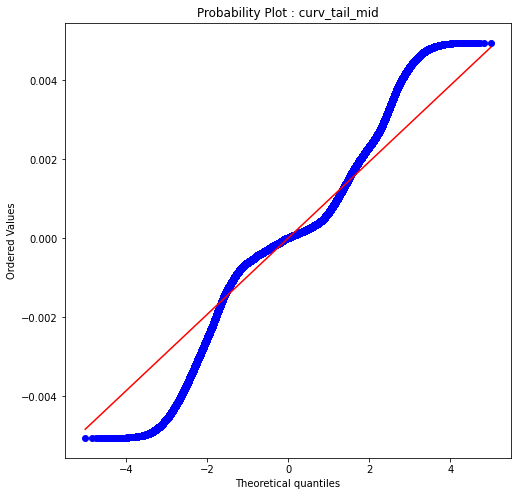

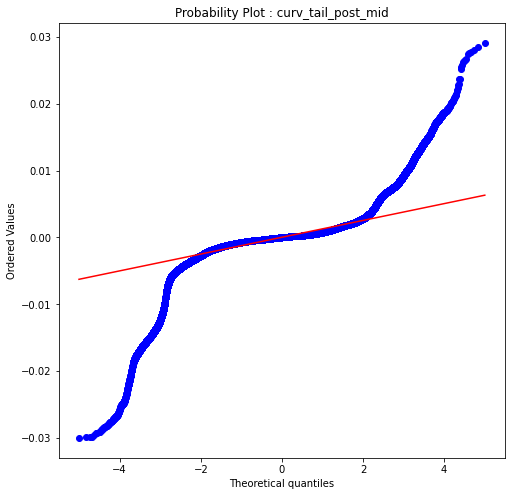

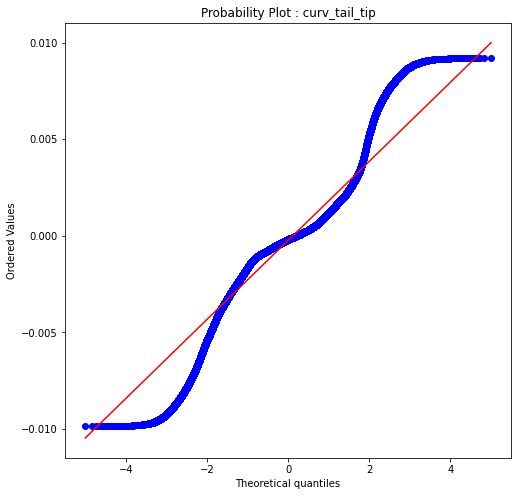

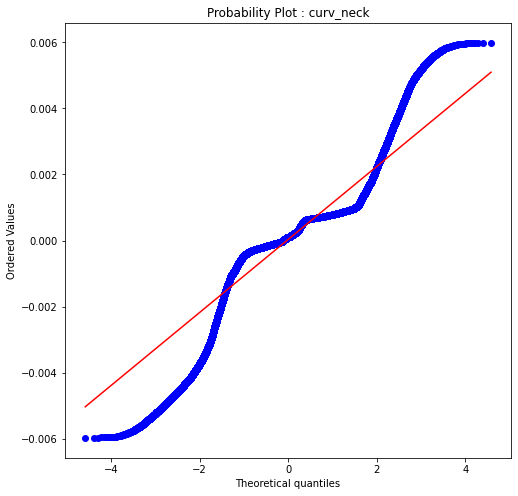

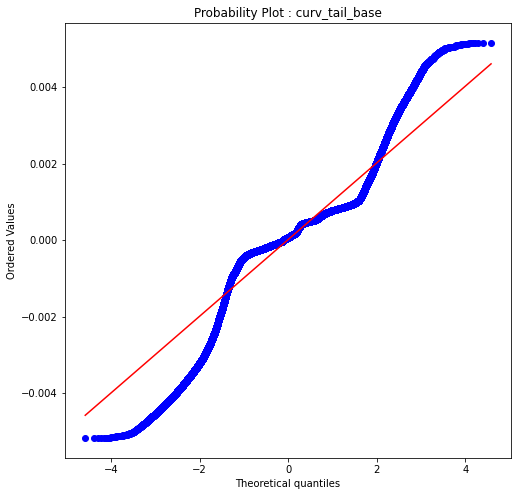

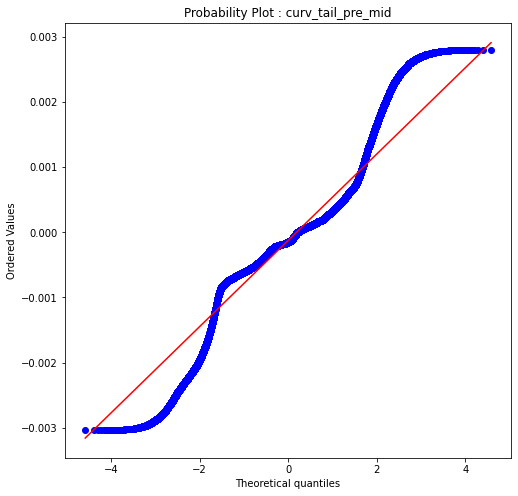

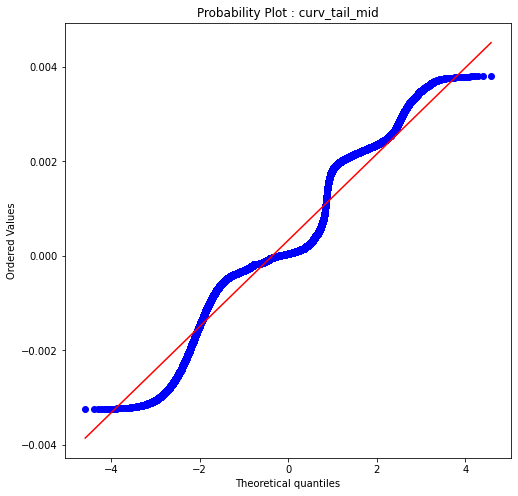

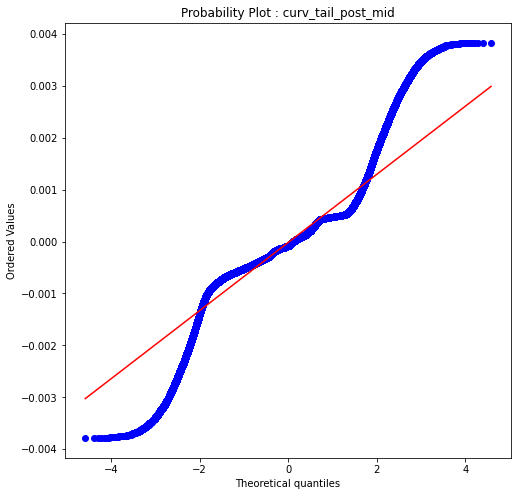

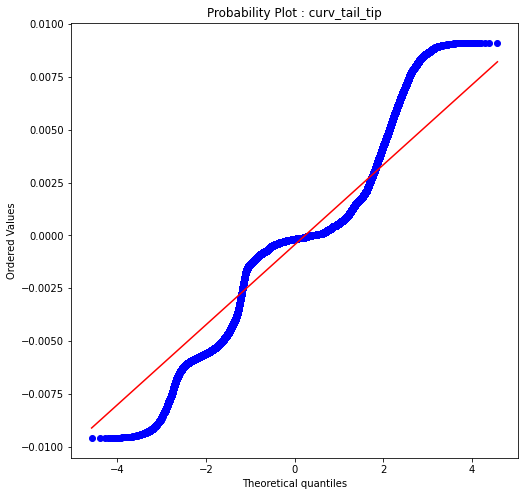

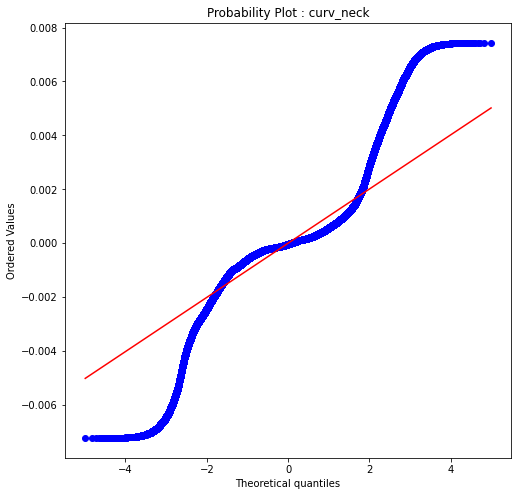

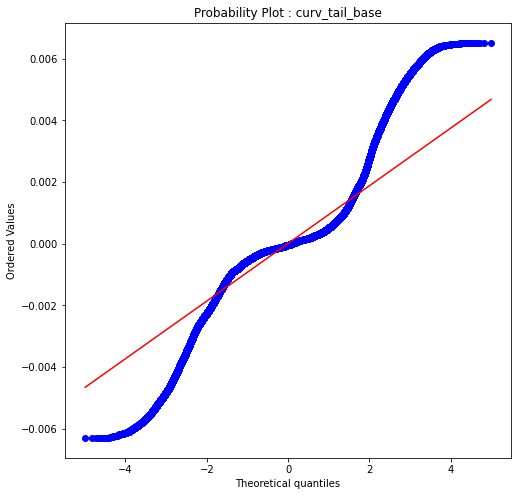

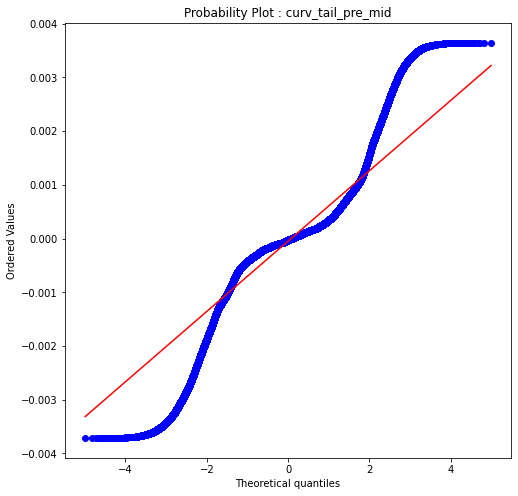

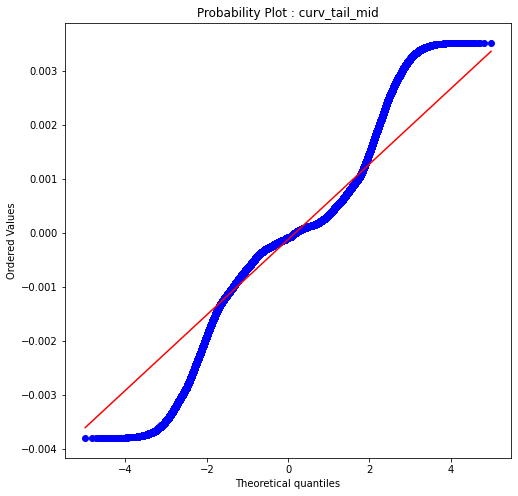

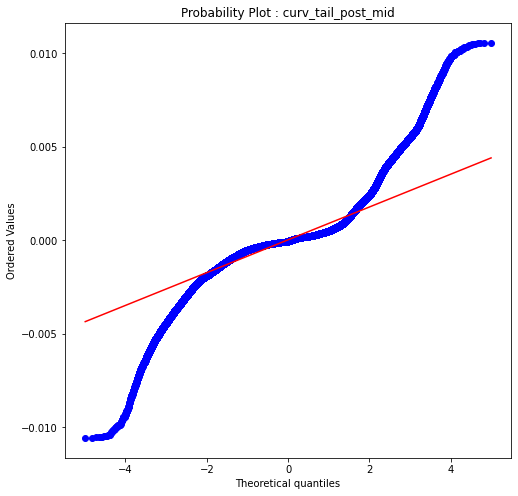

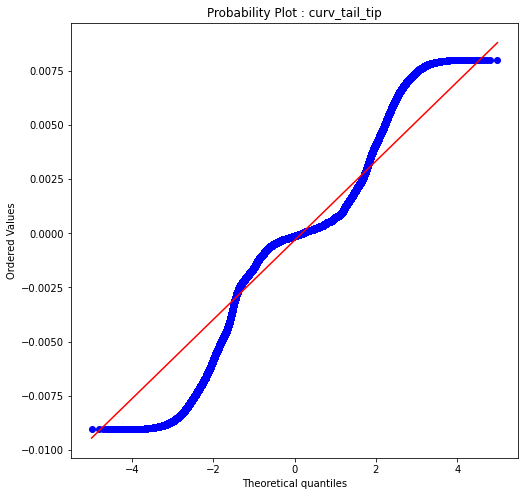

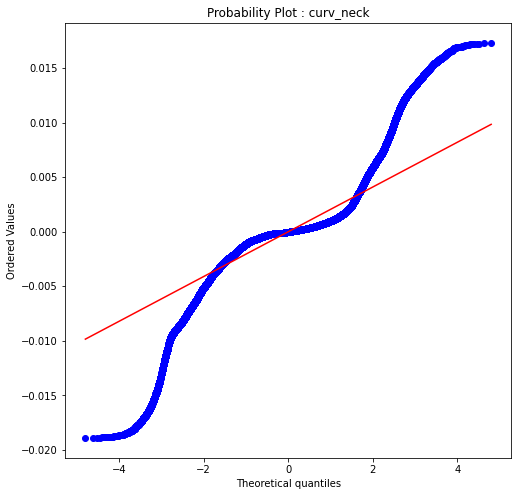

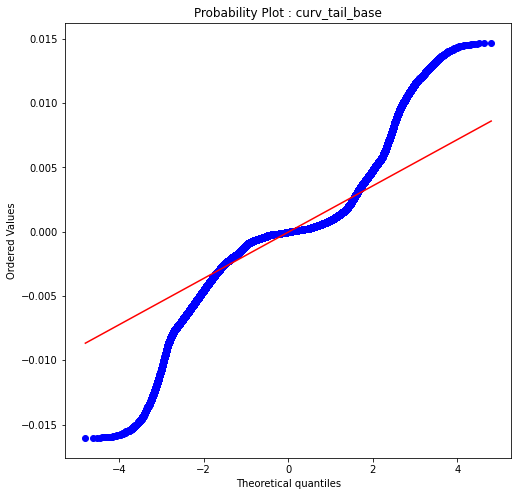

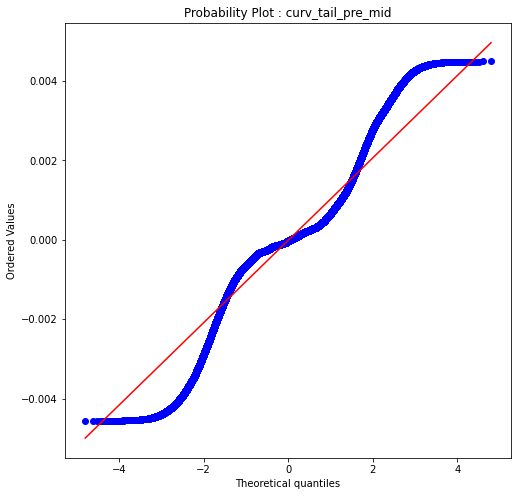

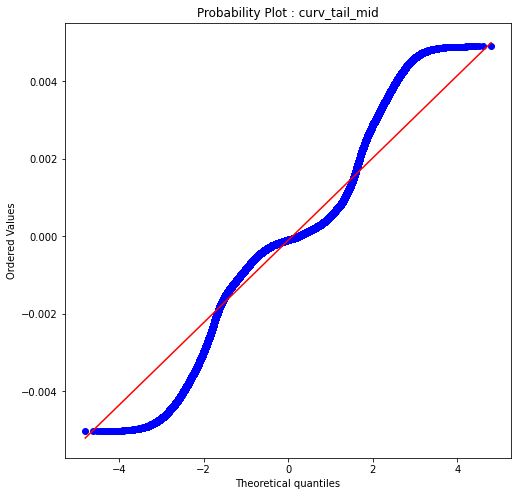

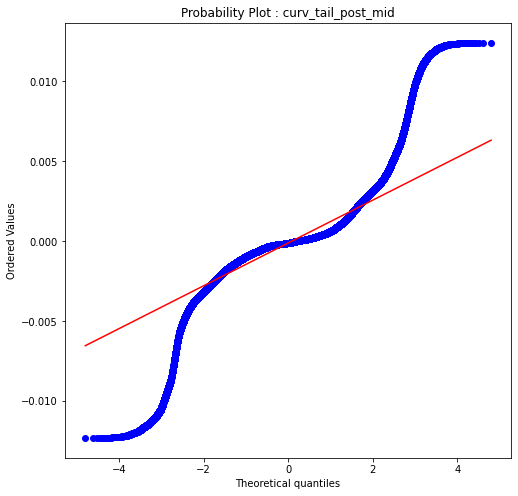

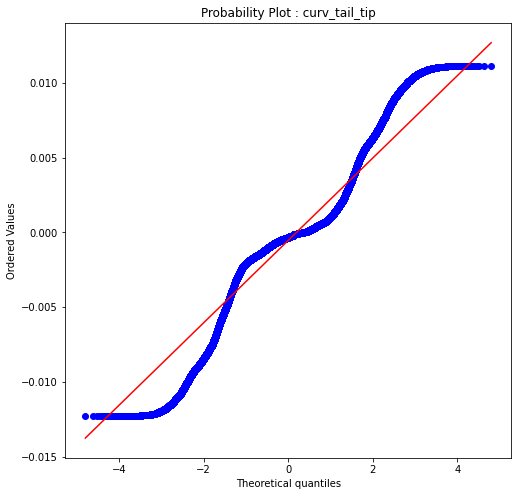

In [378]:
for feat in ['speed', 'curv']:
    for gene in ['cinuthm3d', 'cinuthm4d','cralbhm3d','cralbhm4d']:
        df_gene = df_features_cleansed[df_features_cleansed['gene']==gene]
        for drug in ['cno', 'none']:
            df_gene_drug = get_melted_df(df=df_gene, feat=feat, drug=drug, melted=False)
            df_gene_drug.reset_index(drop=True, inplace=True)
            
            fn_shapiro = f'./results/statistics/shapiro-wilk/stats_shapiro_{feat}_{gene}_{drug}.csv'
            df_shapiro = df_gene_drug.filter(like=feat).apply(lambda x: stats.shapiro(x))
            df_shapiro.rename(index={0:'U-stat', 1:'pvalue'}, inplace=True)
            df_shapiro.reset_index(inplace=True)
            df_shapiro.to_csv(fn_shapiro)
        
            for col in feats_dict[feat]:
                fig, ax = plt.subplots(1,1,figsize=(8,8))
                stats.probplot(df_gene_drug[col], dist='norm', plot=ax)
                ax.set_title(f'Probability Plot : {col}')
                fig.savefig(f'./results/statistics/qqplots/qqplot_{gene}_{drug}_{col}.svg')
        

# Statistics - Mann-Whitney-U

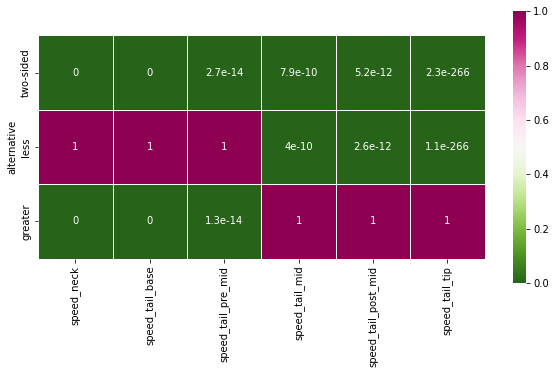

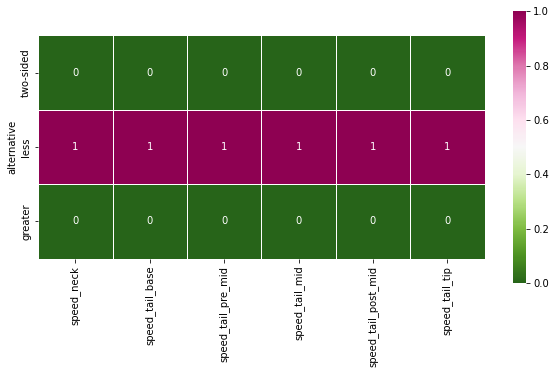

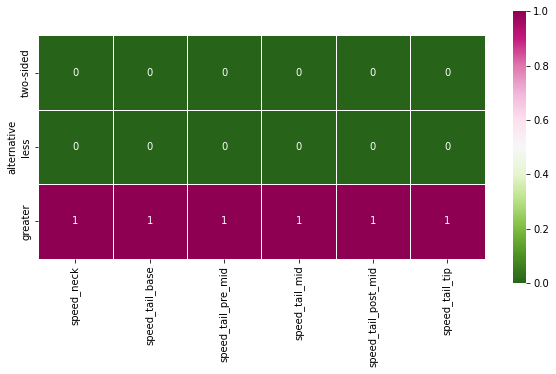

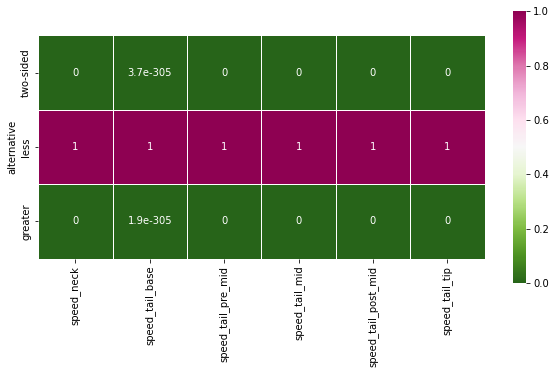

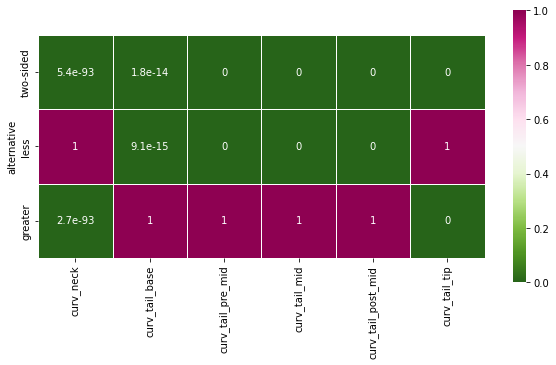

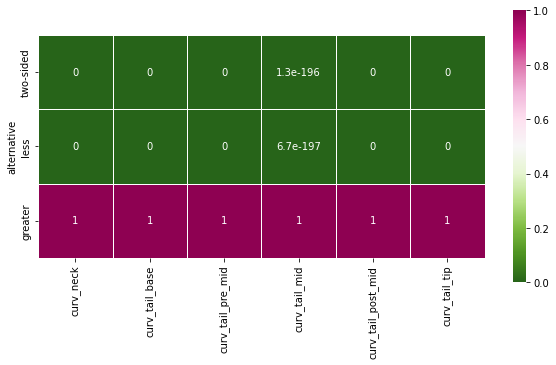

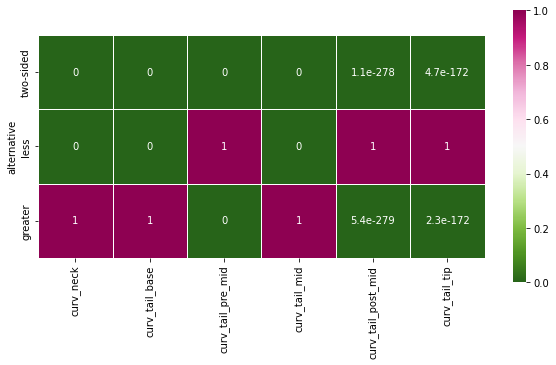

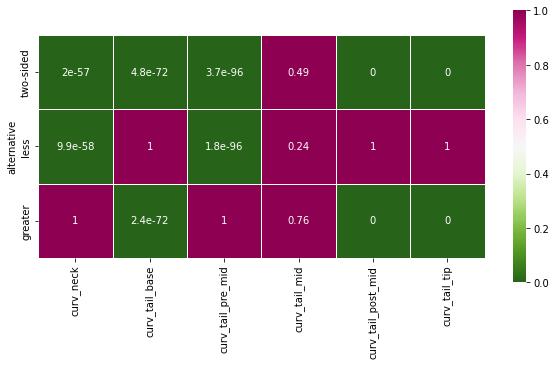

In [379]:
index = pd.MultiIndex.from_product([['two_tailed', 'less', 'greater'], ['statistic', 'pvalue']], 
                                             names=['alternative', 'result_type'])
for feat in ['speed', 'curv']:
    
    for gene in ['cinuthm3d', 'cinuthm4d','cralbhm3d','cralbhm4d']:
        df_gene = df_features_cleansed[df_features_cleansed['gene']==gene]
        
        df_drug_dict = {}
        for drug in ['cno', 'none']:
            df_gene_drug = get_melted_df(df=df_gene, feat=feat, drug=drug, melted=False)
            df_gene_drug.reset_index(drop=True, inplace=True)
            df_drug_dict[drug] = df_gene_drug.filter(like=feat)
        
        df_mwu = pd.DataFrame(index=test_multiindex, columns=feats_dict[feat])
        
        for alt in list(df_mwu_test.index.get_level_values(level=0).unique()):
            result_mwu = stats.mannwhitneyu(df_drug_dict['cno'], df_drug_dict['none'], alternative=alt)
            df_mwu.loc[(alt), :] = np.array(result_mwu)
            
        df_mwu = df_mwu.astype(float)
        df_mwu.to_csv(f'./results/statistics/mannWhitneyU/csv_files/mwu_{feat}_{gene}.csv')
        
        # Plot pvalues as heatmaps
        df_pvals = df_mwu.loc[:, ('pvalue'), :]
        fig, ax = plt.subplots(1,1, figsize=(10,5))
        sns.heatmap(df_pvals > 0.05, cmap='PiYG_r', center=0.5, linewidths=1, annot=df_pvals, square=True, ax=ax)
        fig.savefig(f'./results/statistics/mannWhitneyU/pval_heatmaps/heatmap_pvals_{feat}_{gene}.svg')
            